<a href="https://colab.research.google.com/github/kluless13/paper/blob/main/yolov8_COTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Installing dependencies

In [1]:
!nvidia-smi

Sat Sep 16 09:15:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## 2. Datasets

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2dnFoL2vjwfFBNkIUxLZ")
project = rf.workspace("cots").project("google-images-ztm4n")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Success

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Google-Images-2 in yolov8:: 100%|██████████| 6714/6714 [00:00<00:00, 8338.56it/s]


## 3. Model Training

**Note:** Remember to change the path according to where the results are saved.
Or just restart run time for every model run to refresh paths.



### 3.1. YOLOv8s - Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=75 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 145MB/s] 

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Google-Images-2/data.yaml, epochs=75, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch12481.jpg
confusion_matrix.png				    train_batch12482.jpg
events.out.tfevents.1694855983.5b2c3cb69a7d.5408.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch12480.jpg				    weights


/content


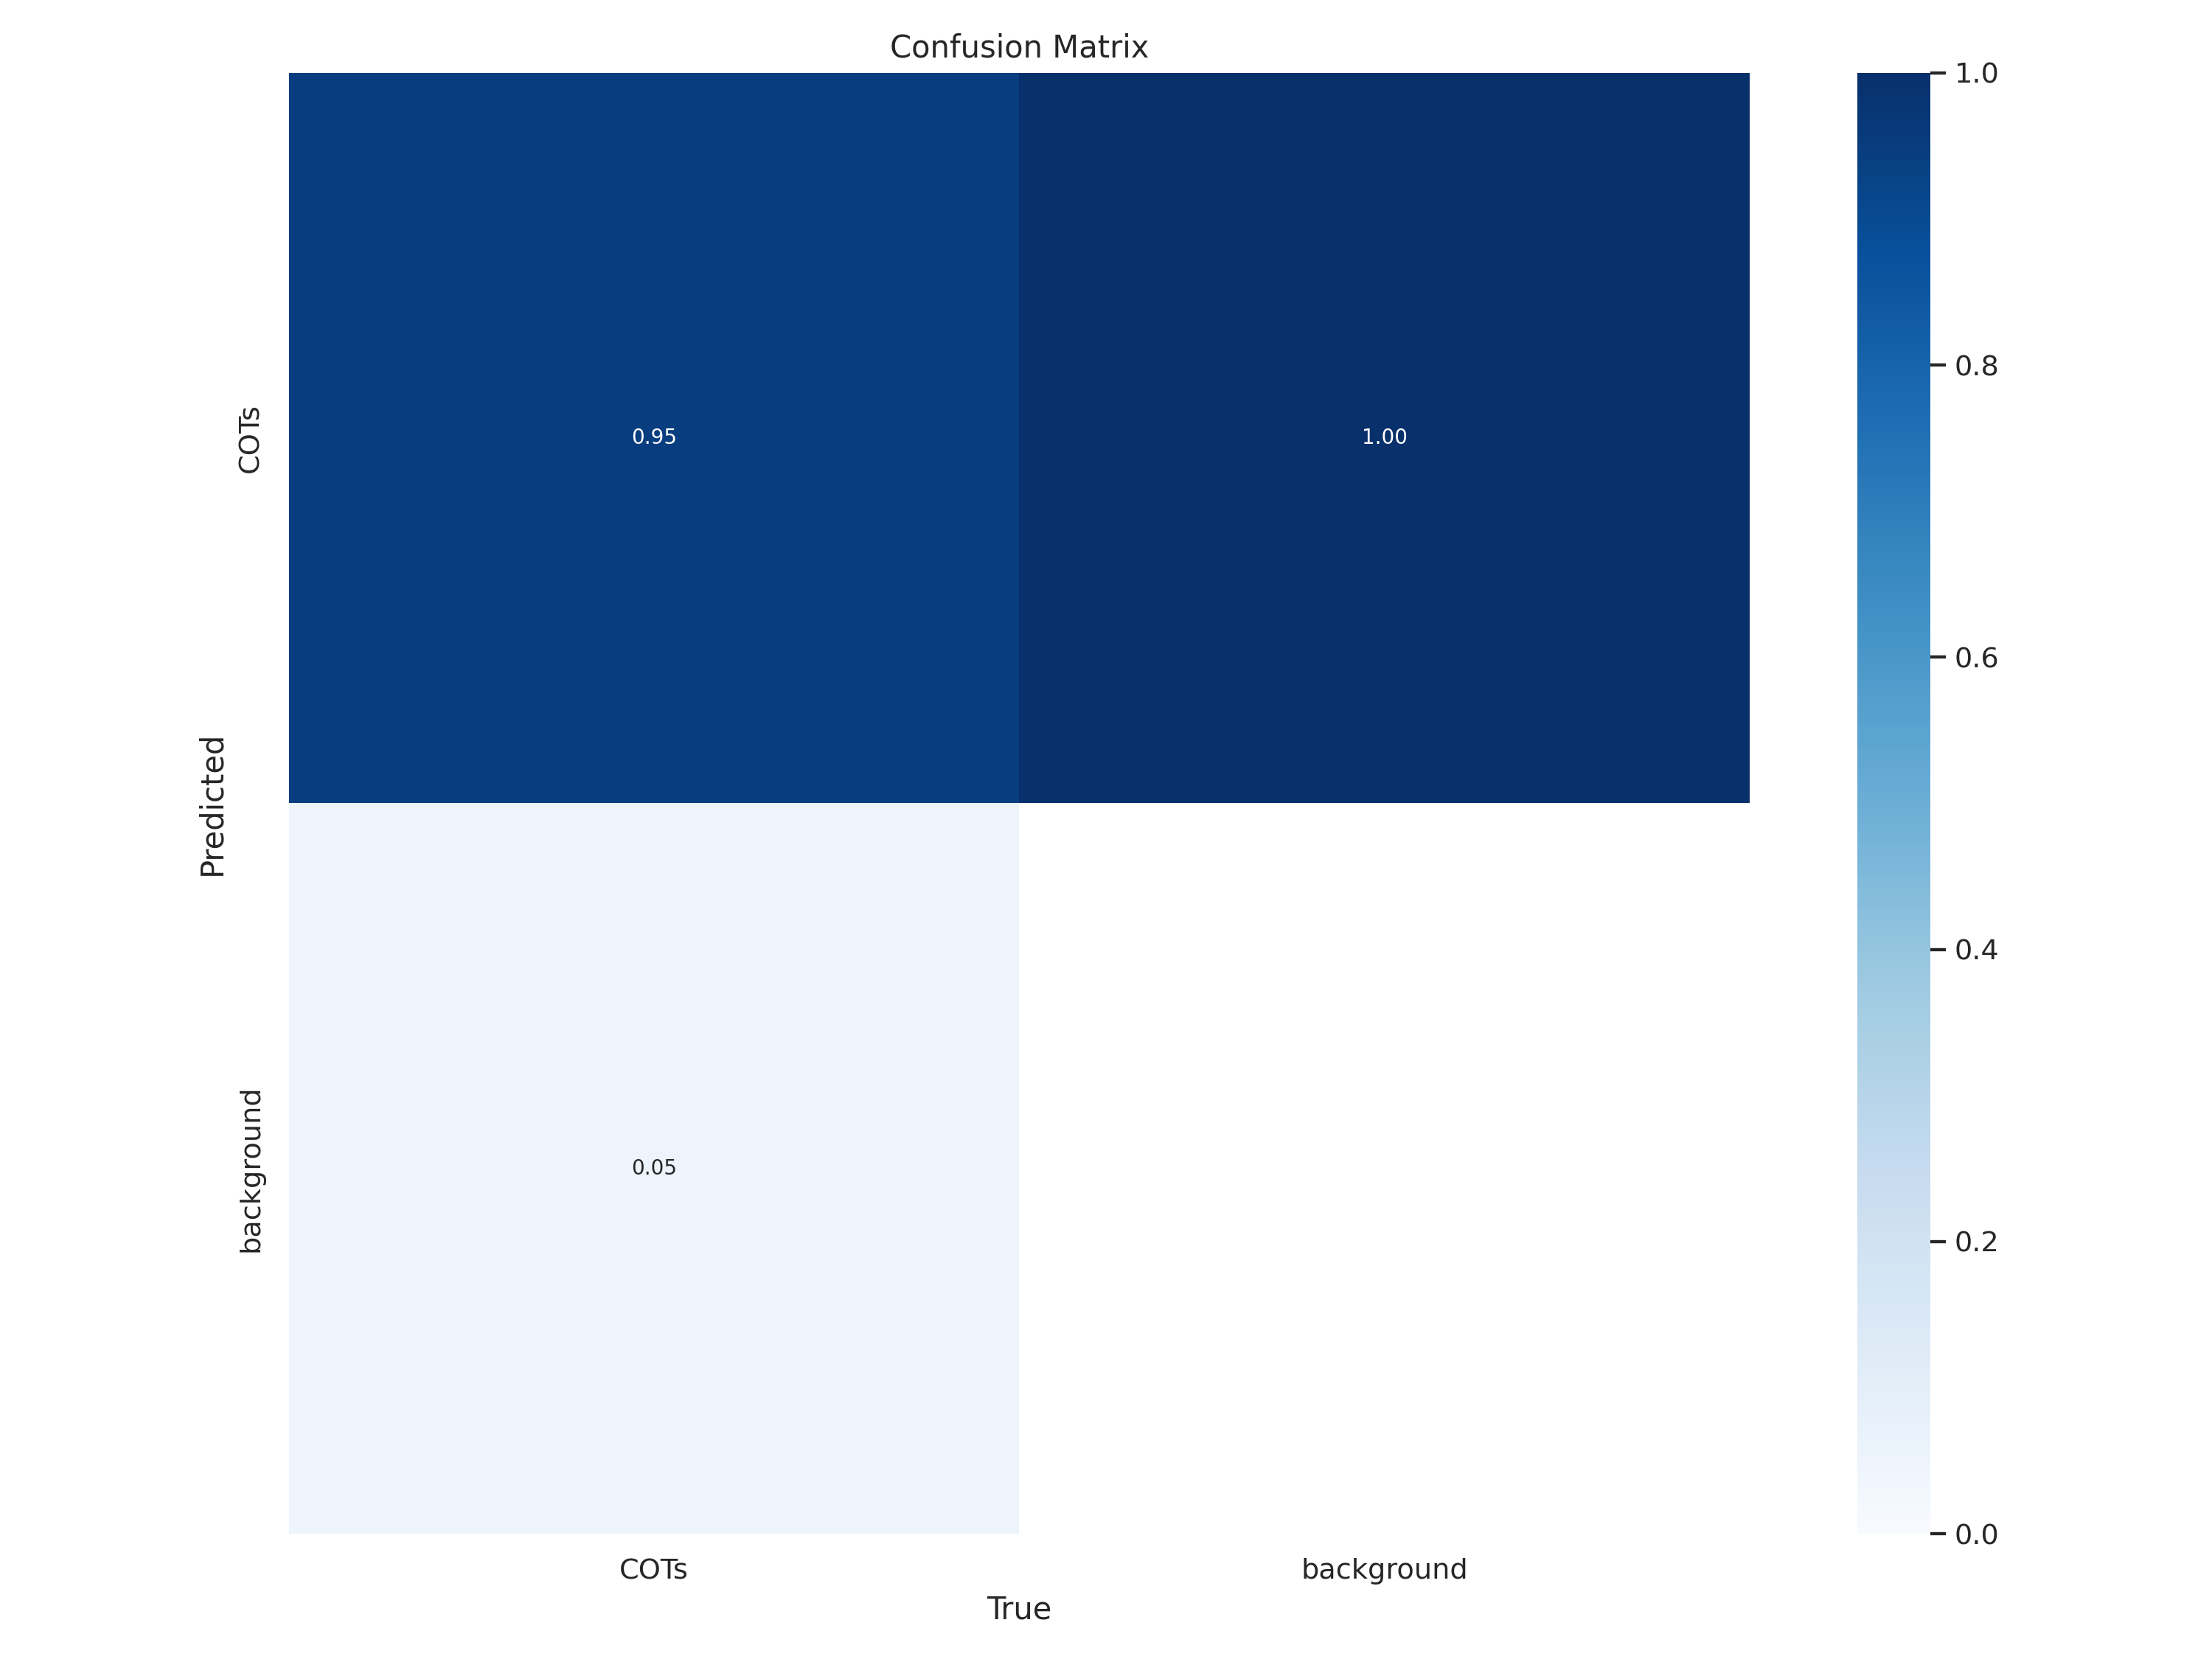

In [8]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


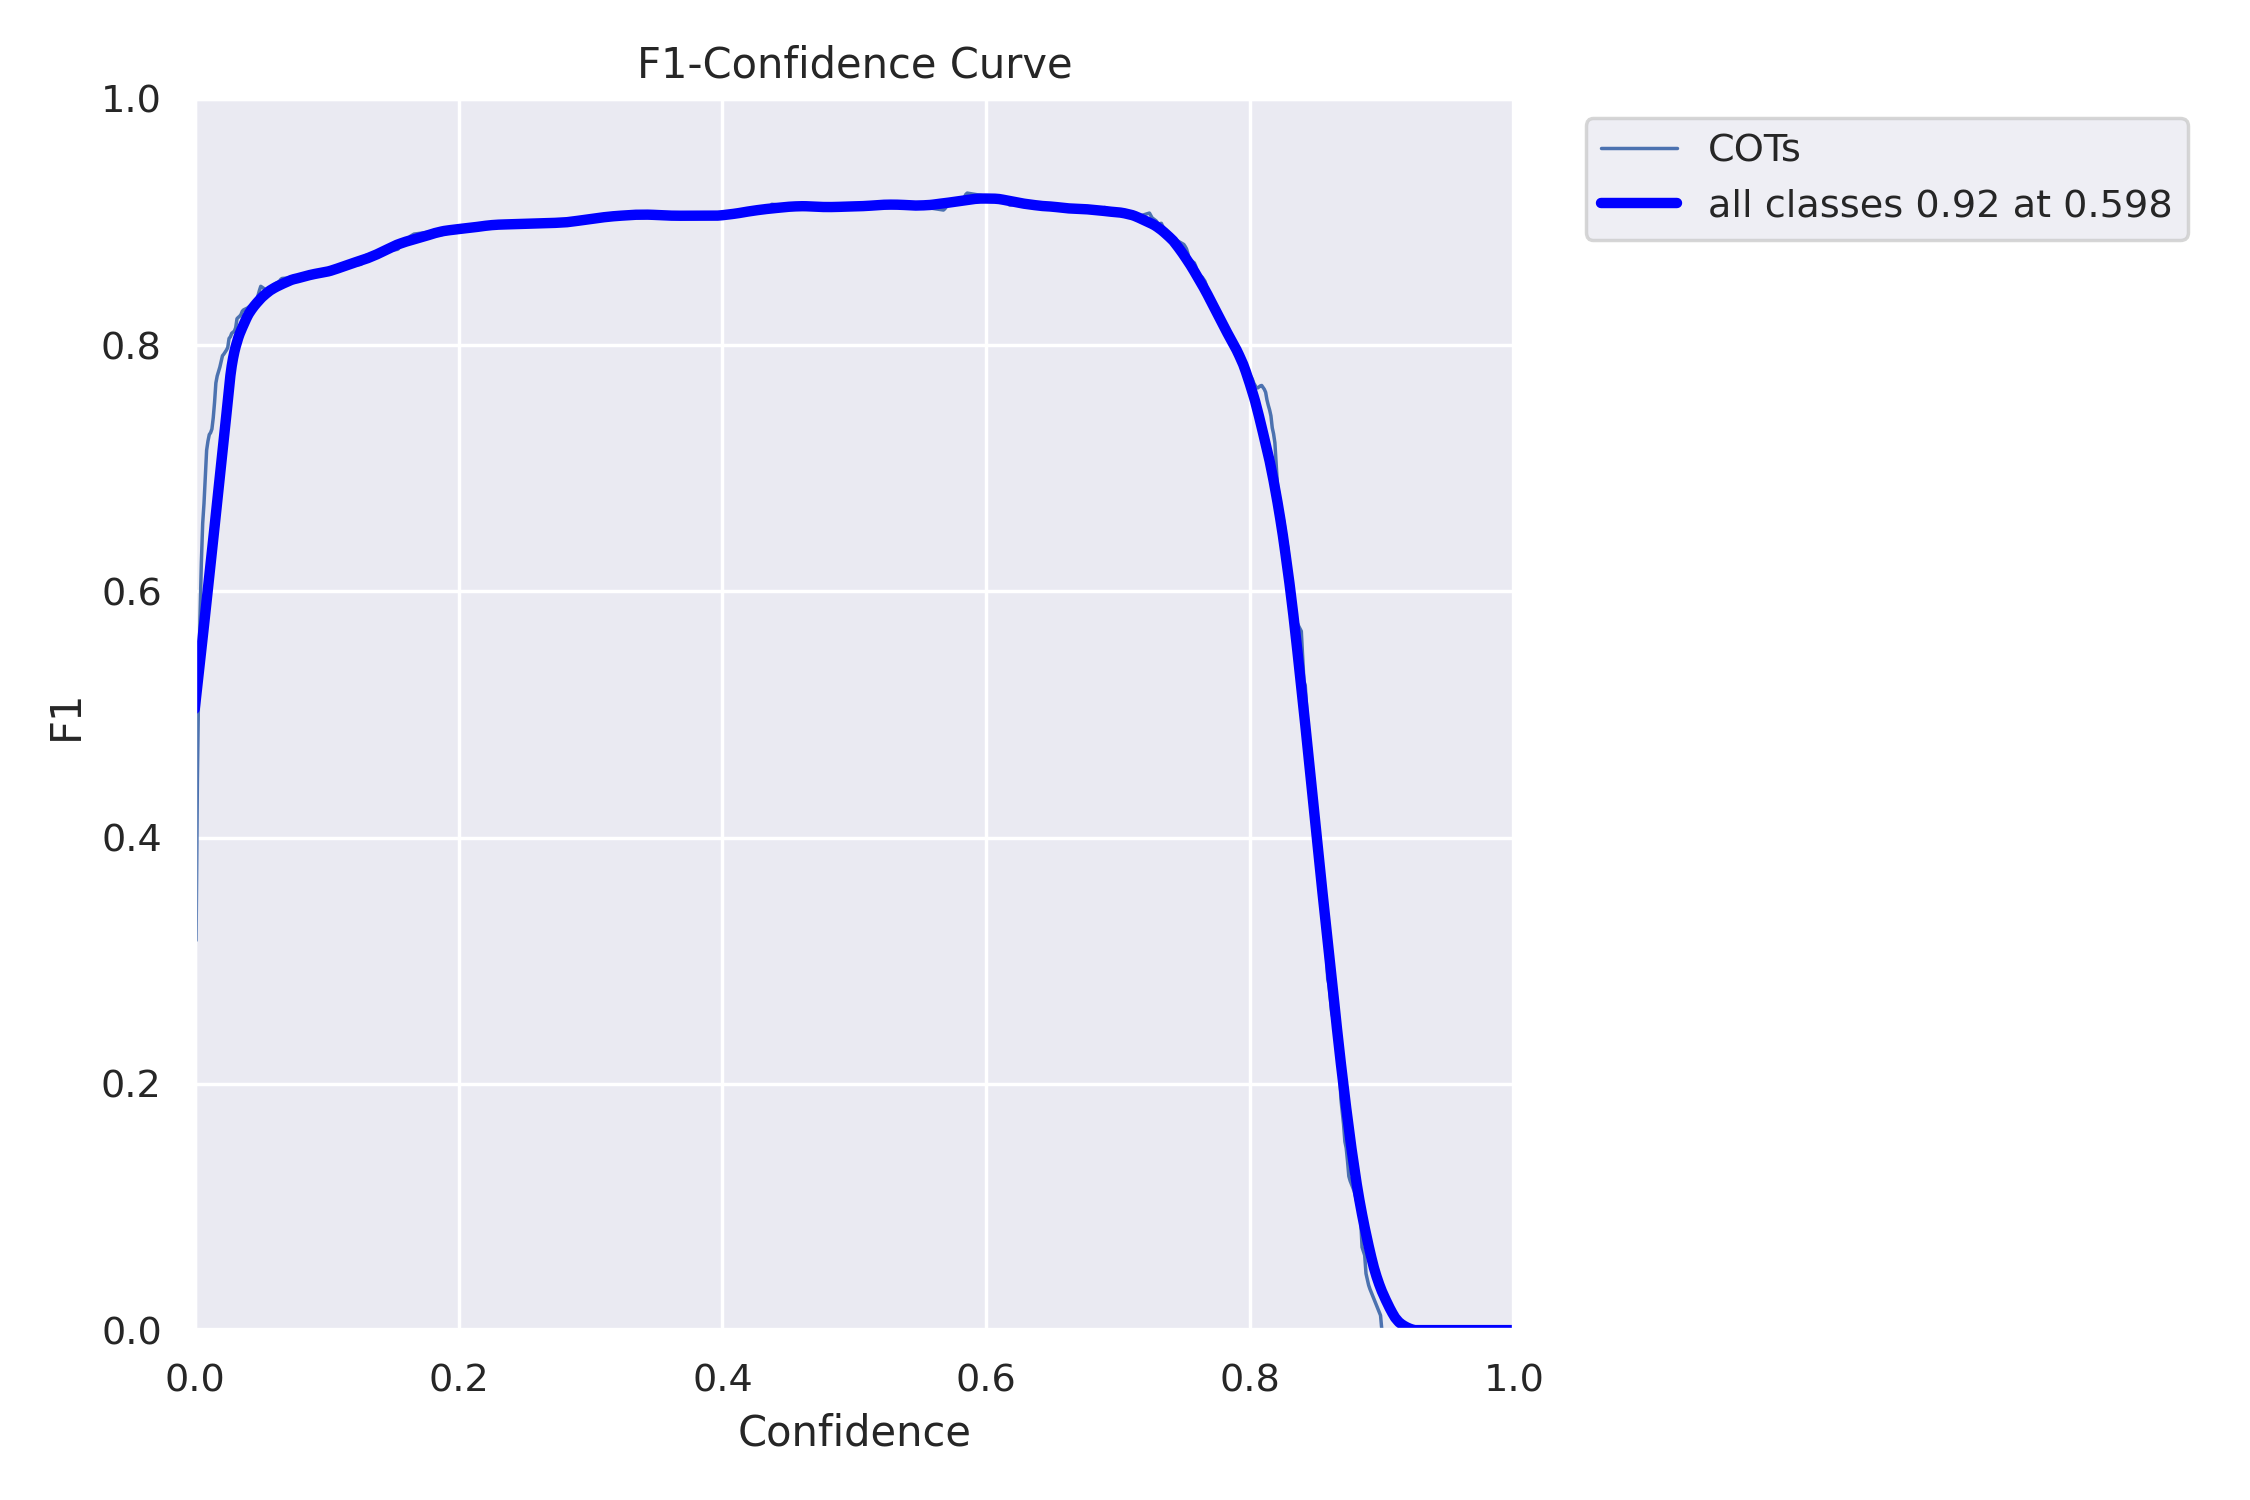

In [9]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


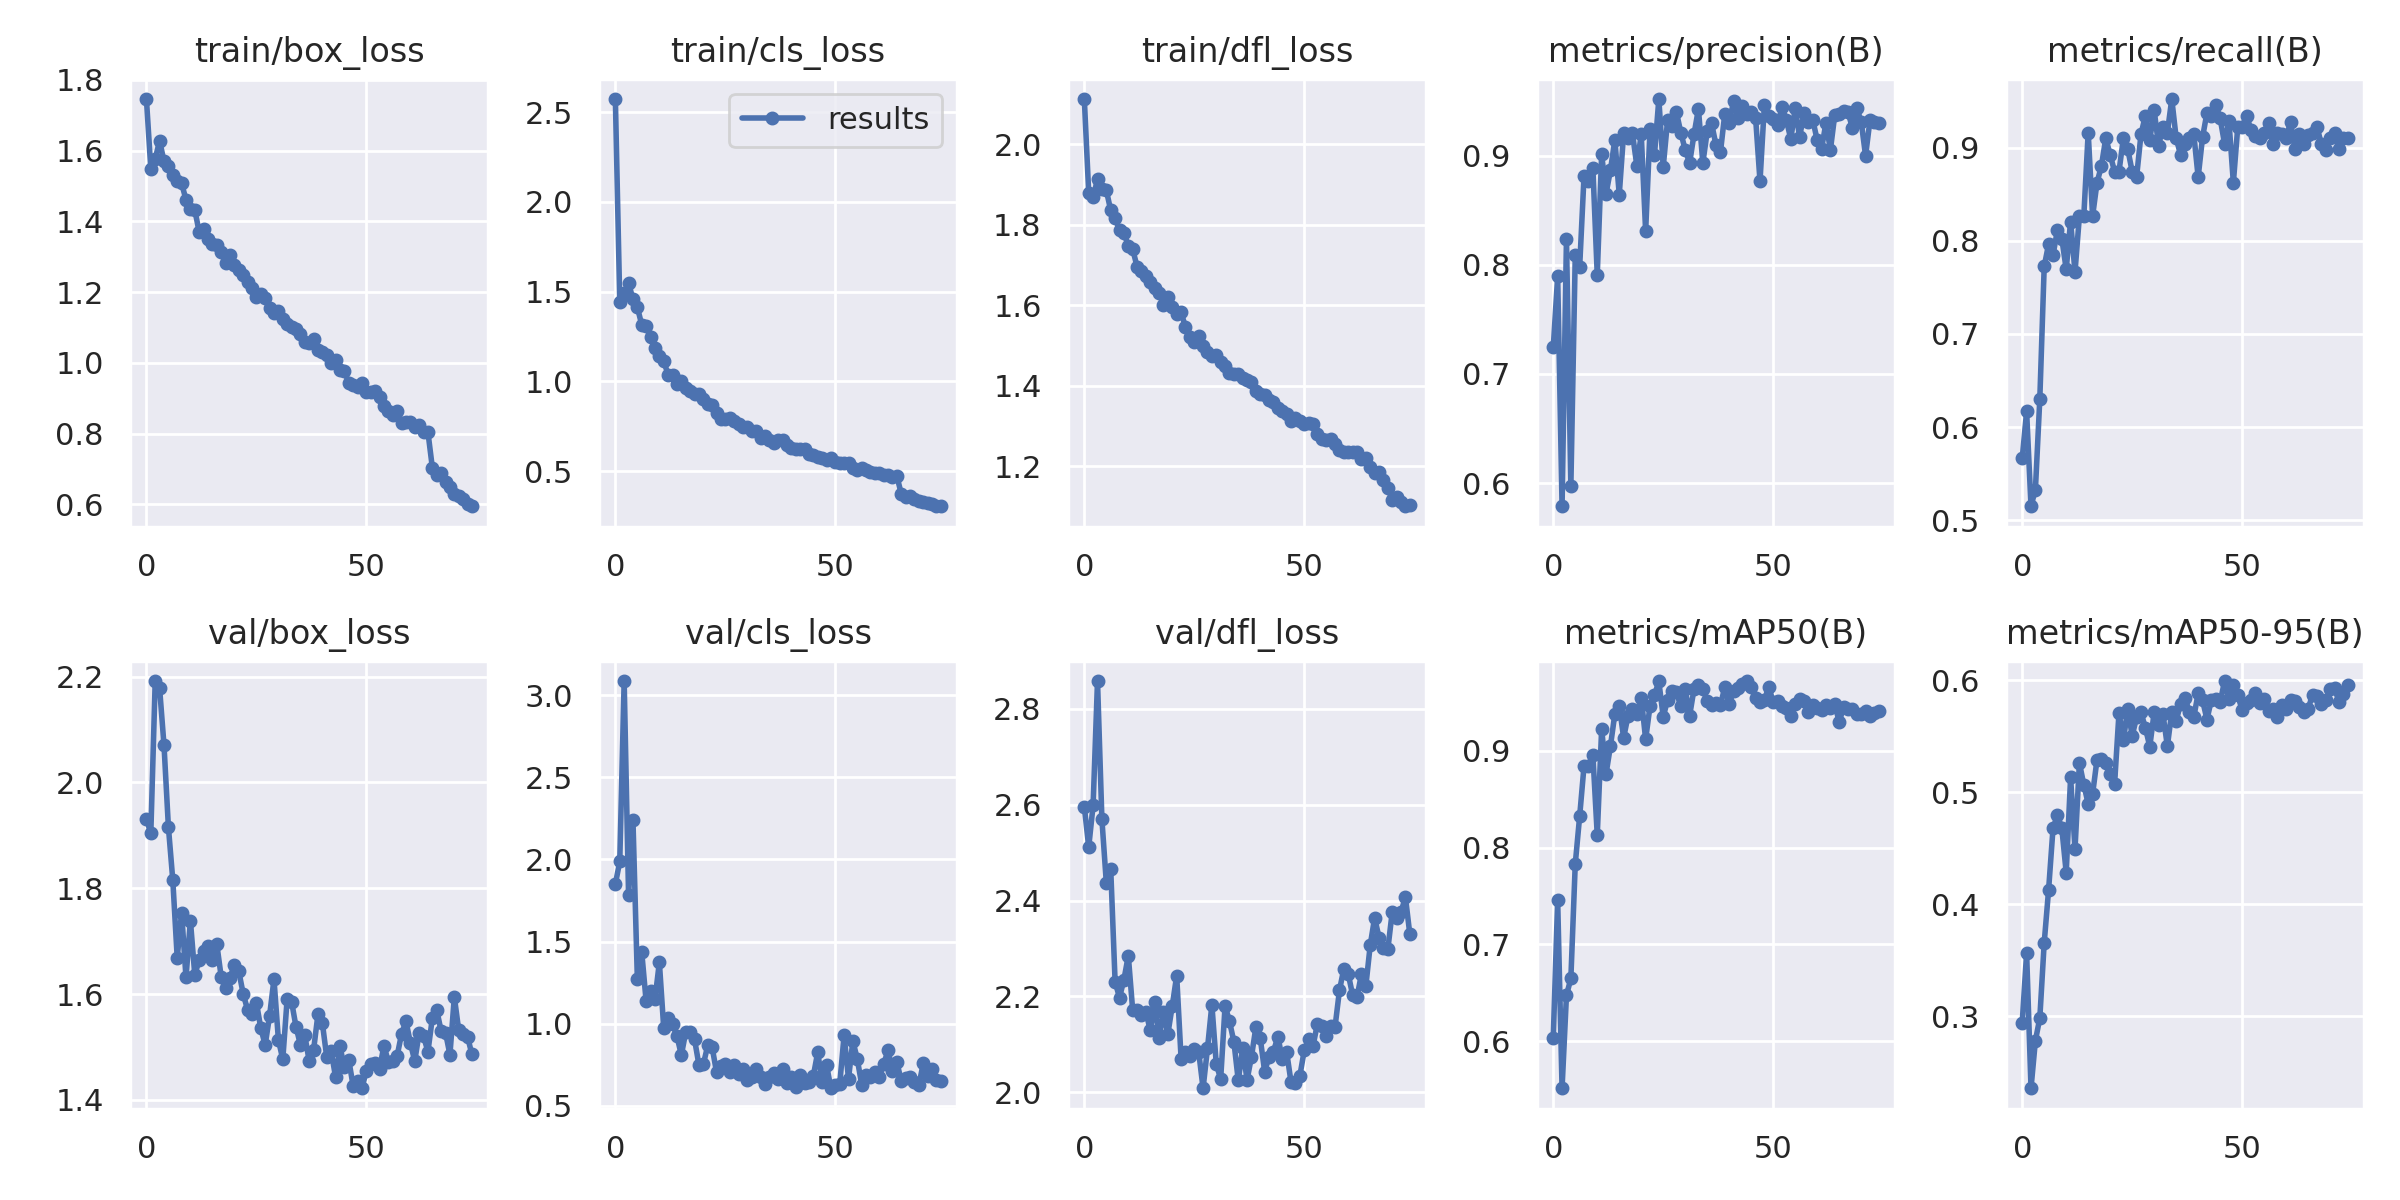

In [10]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

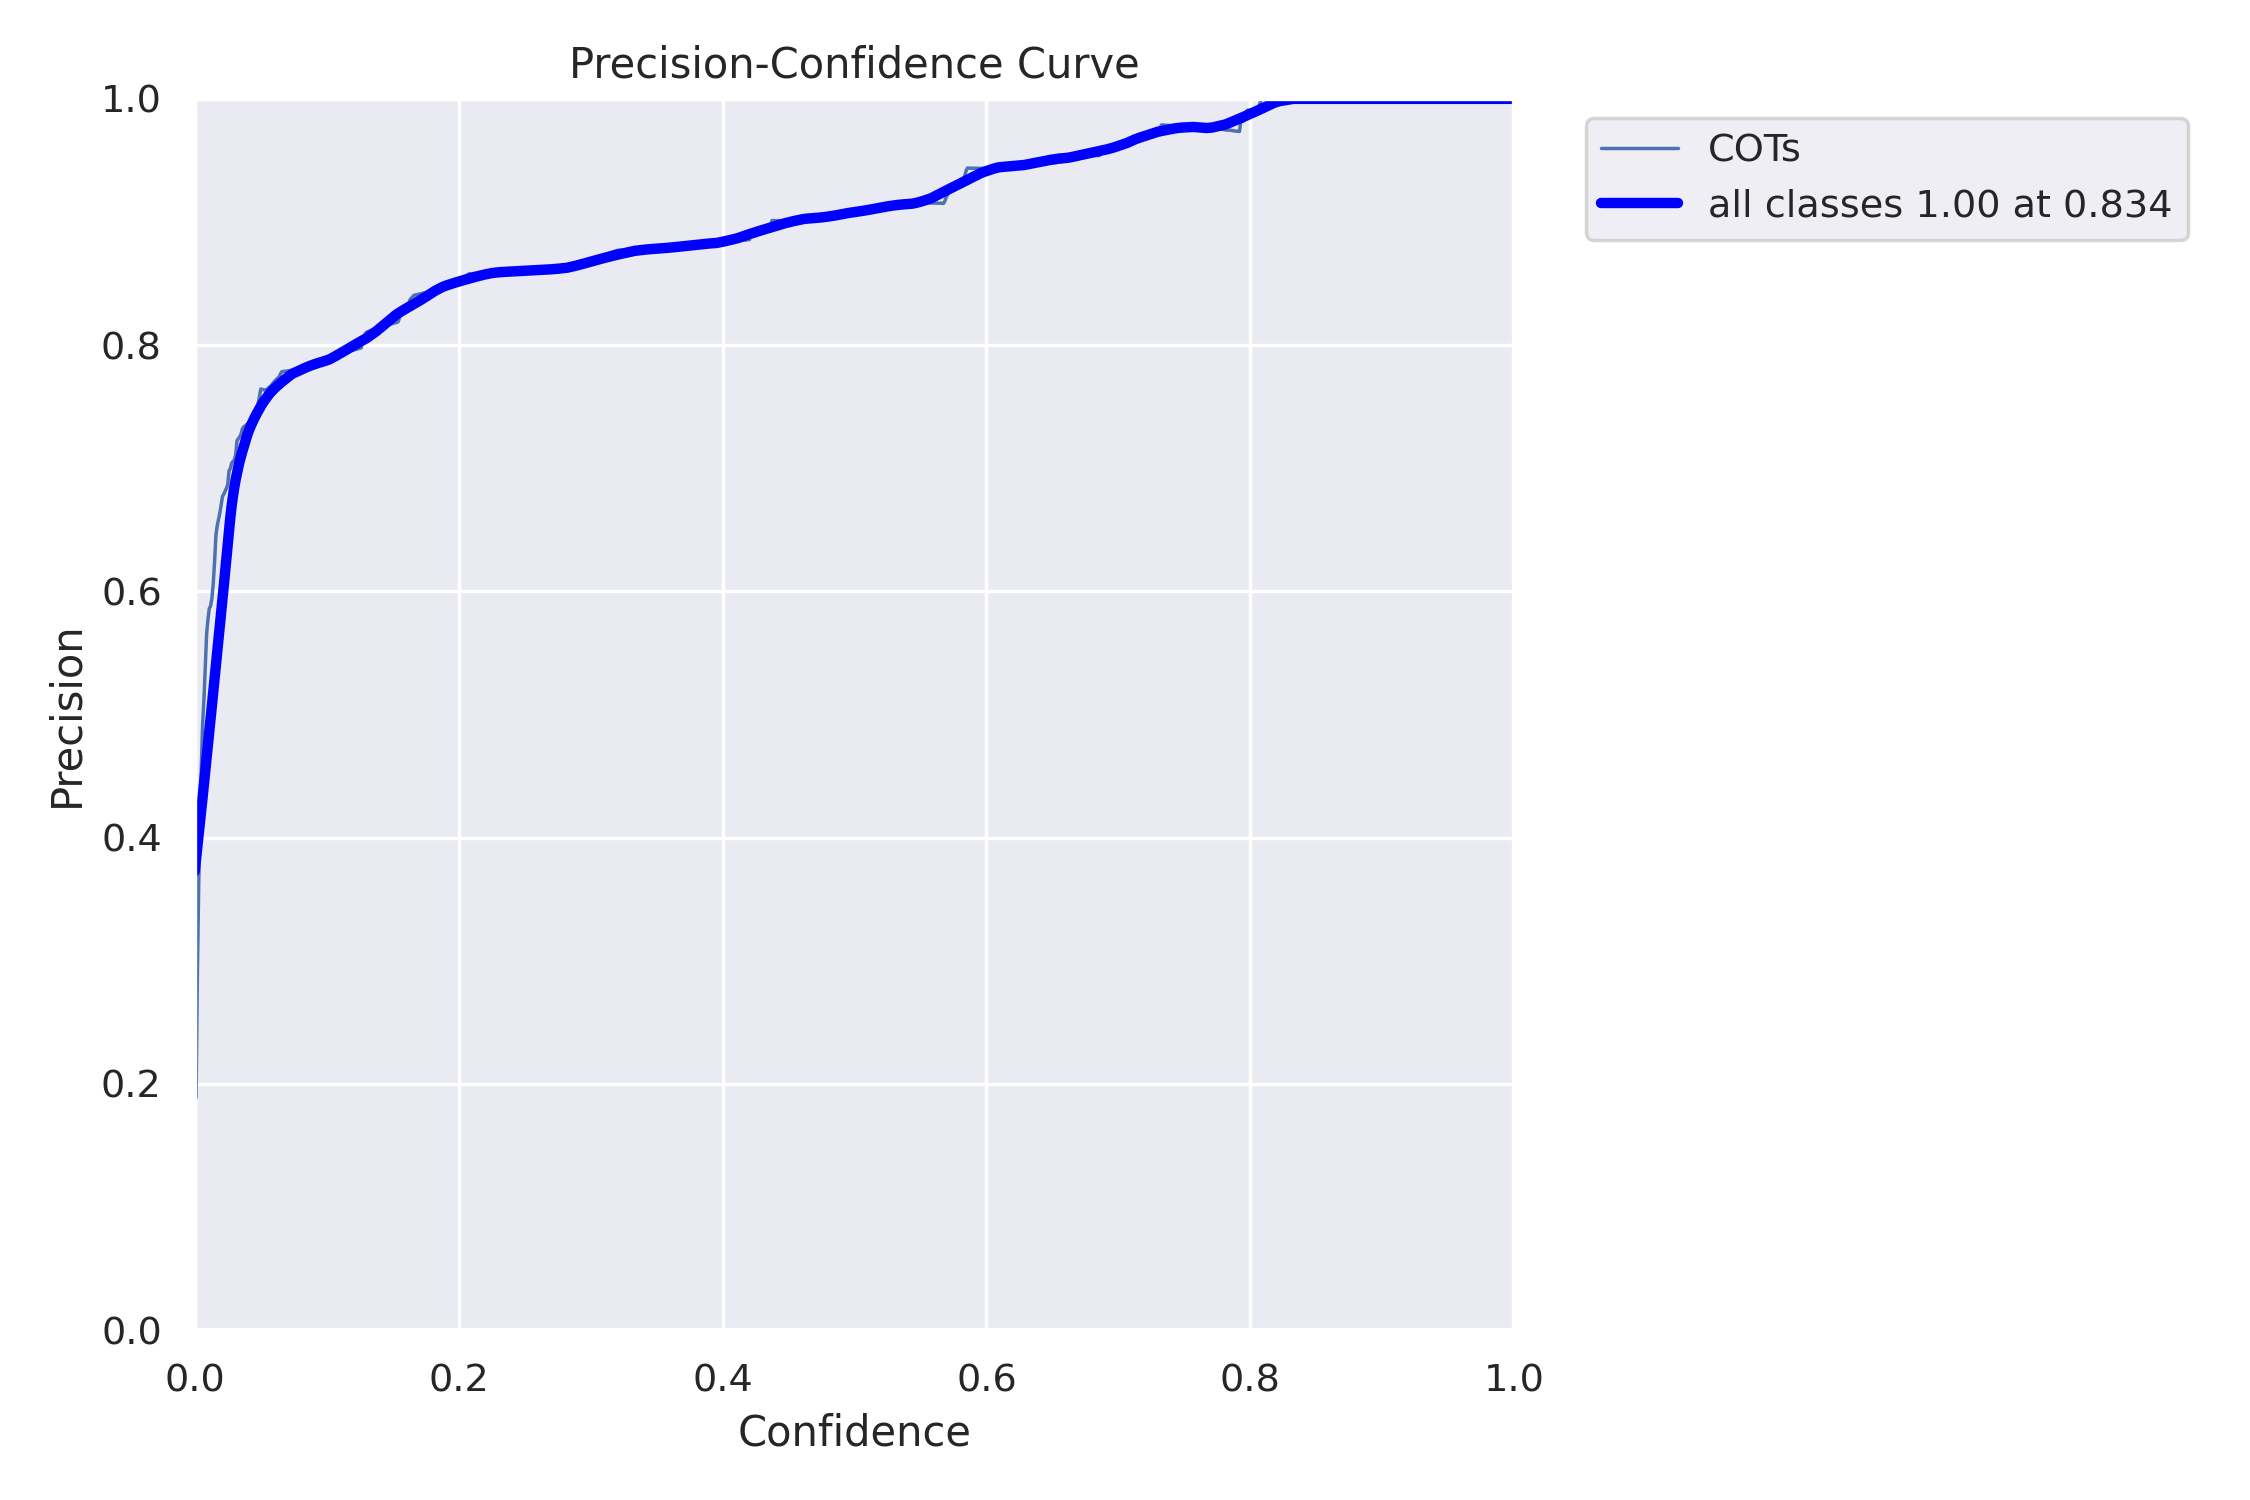

In [11]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

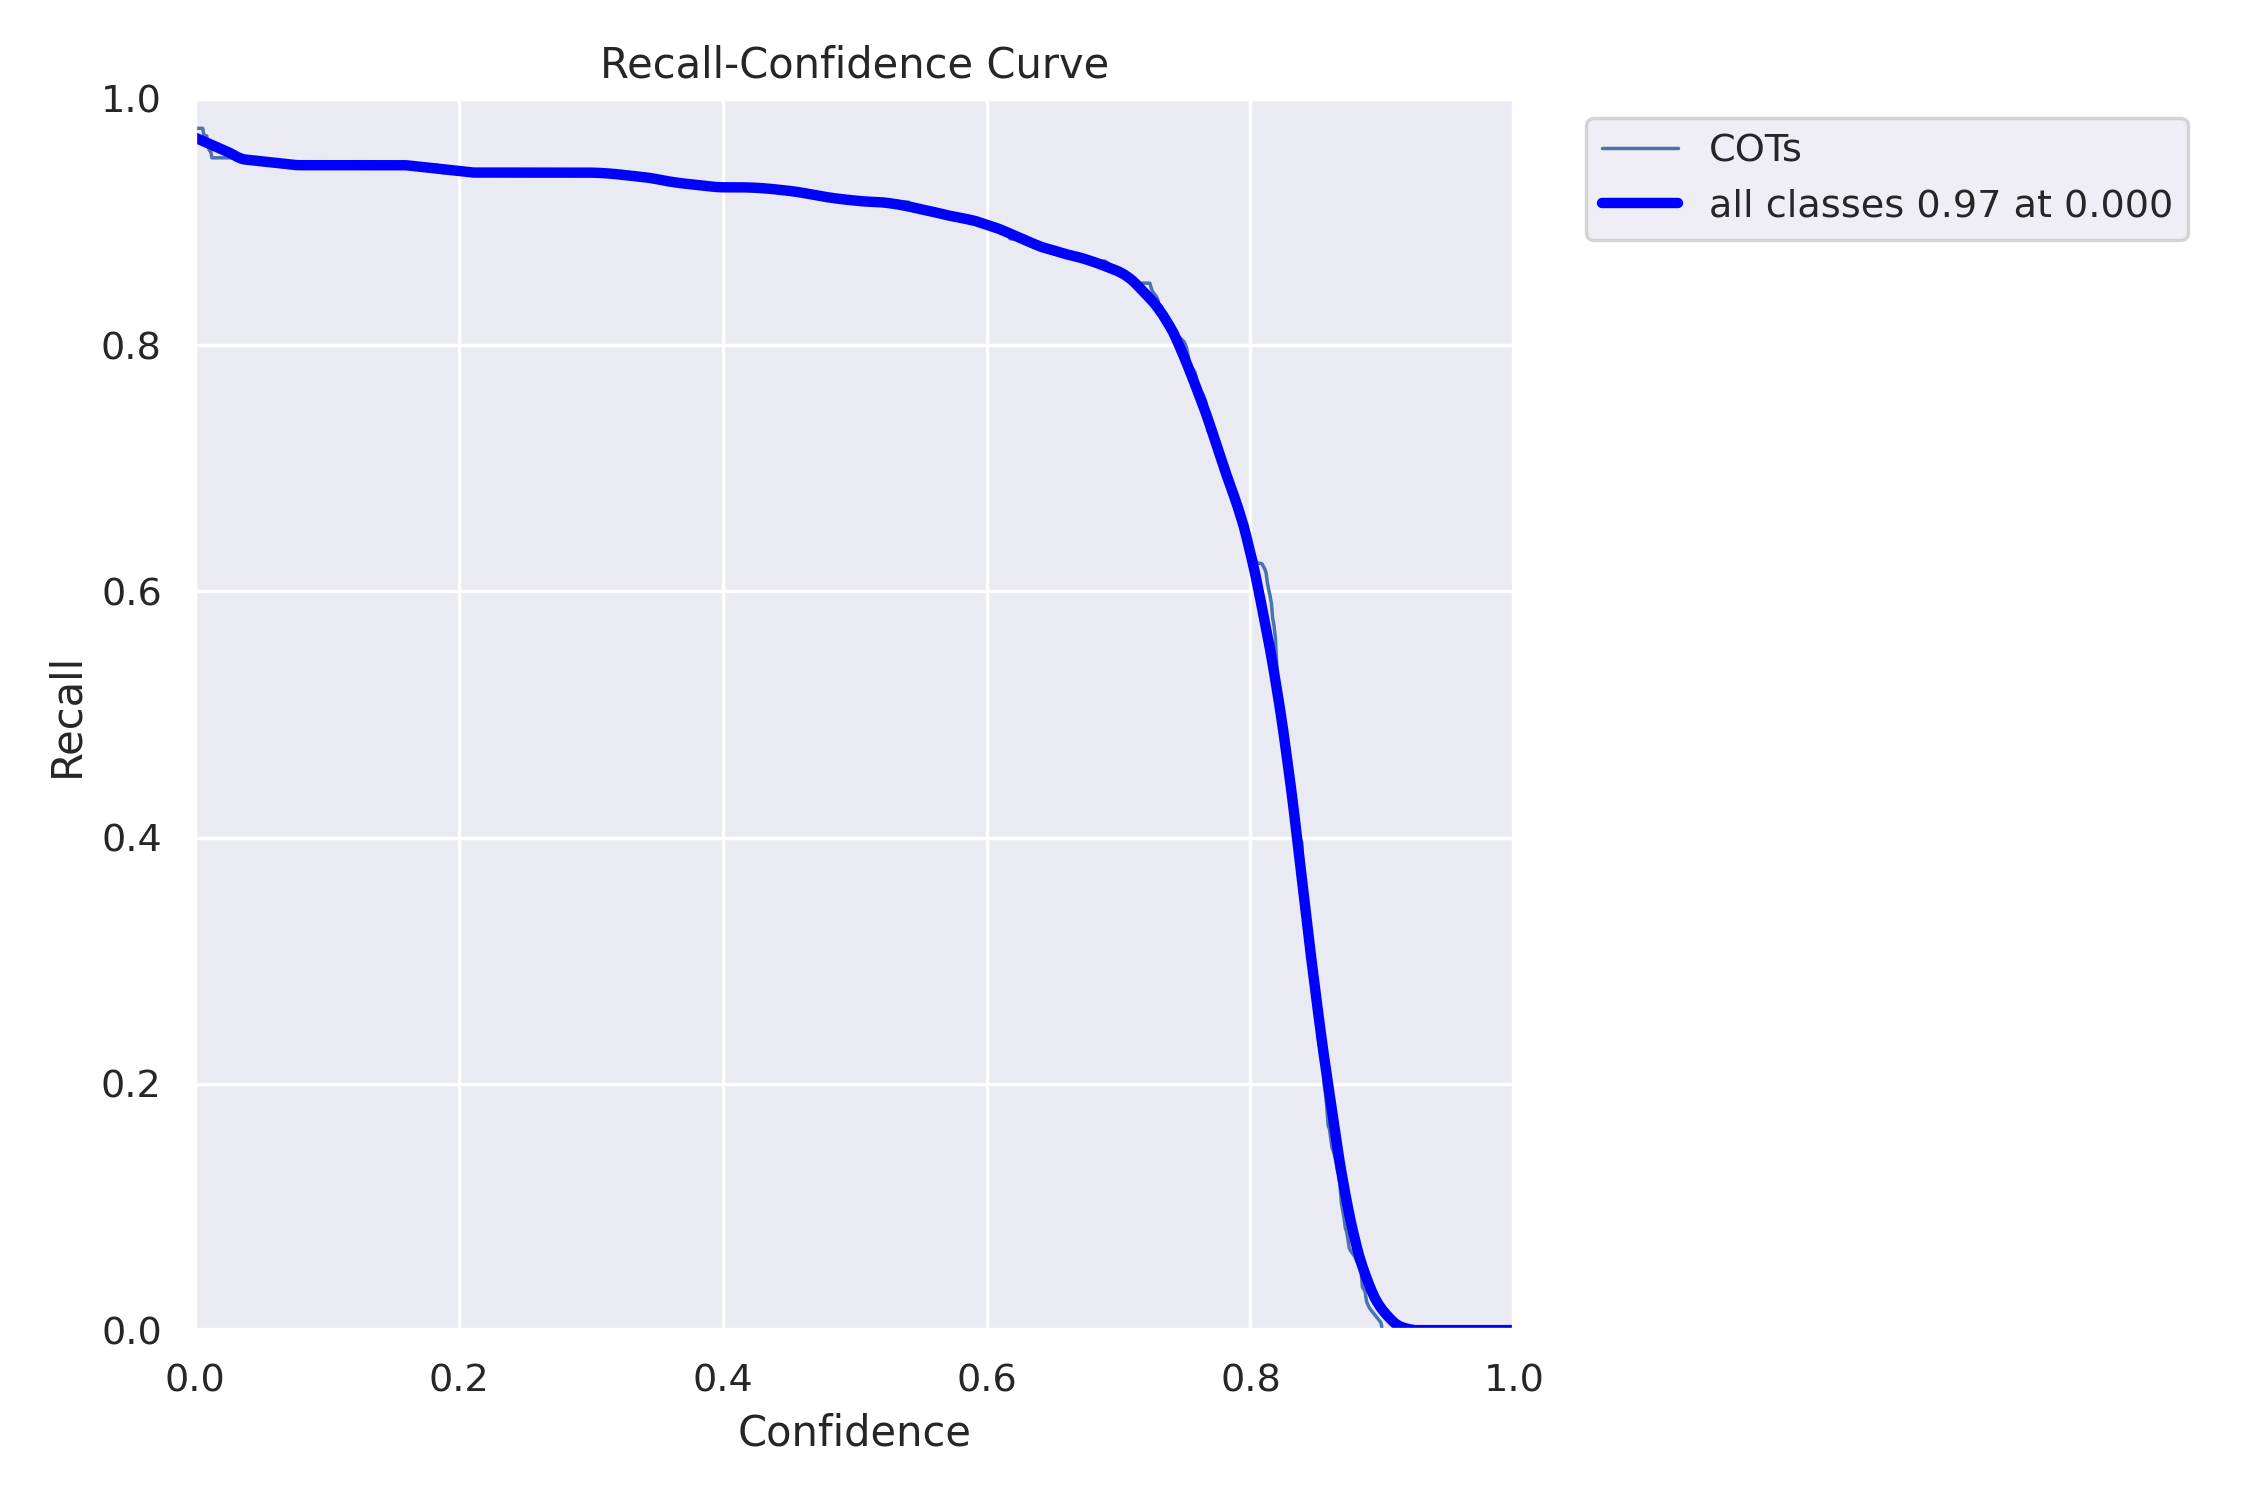

In [12]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

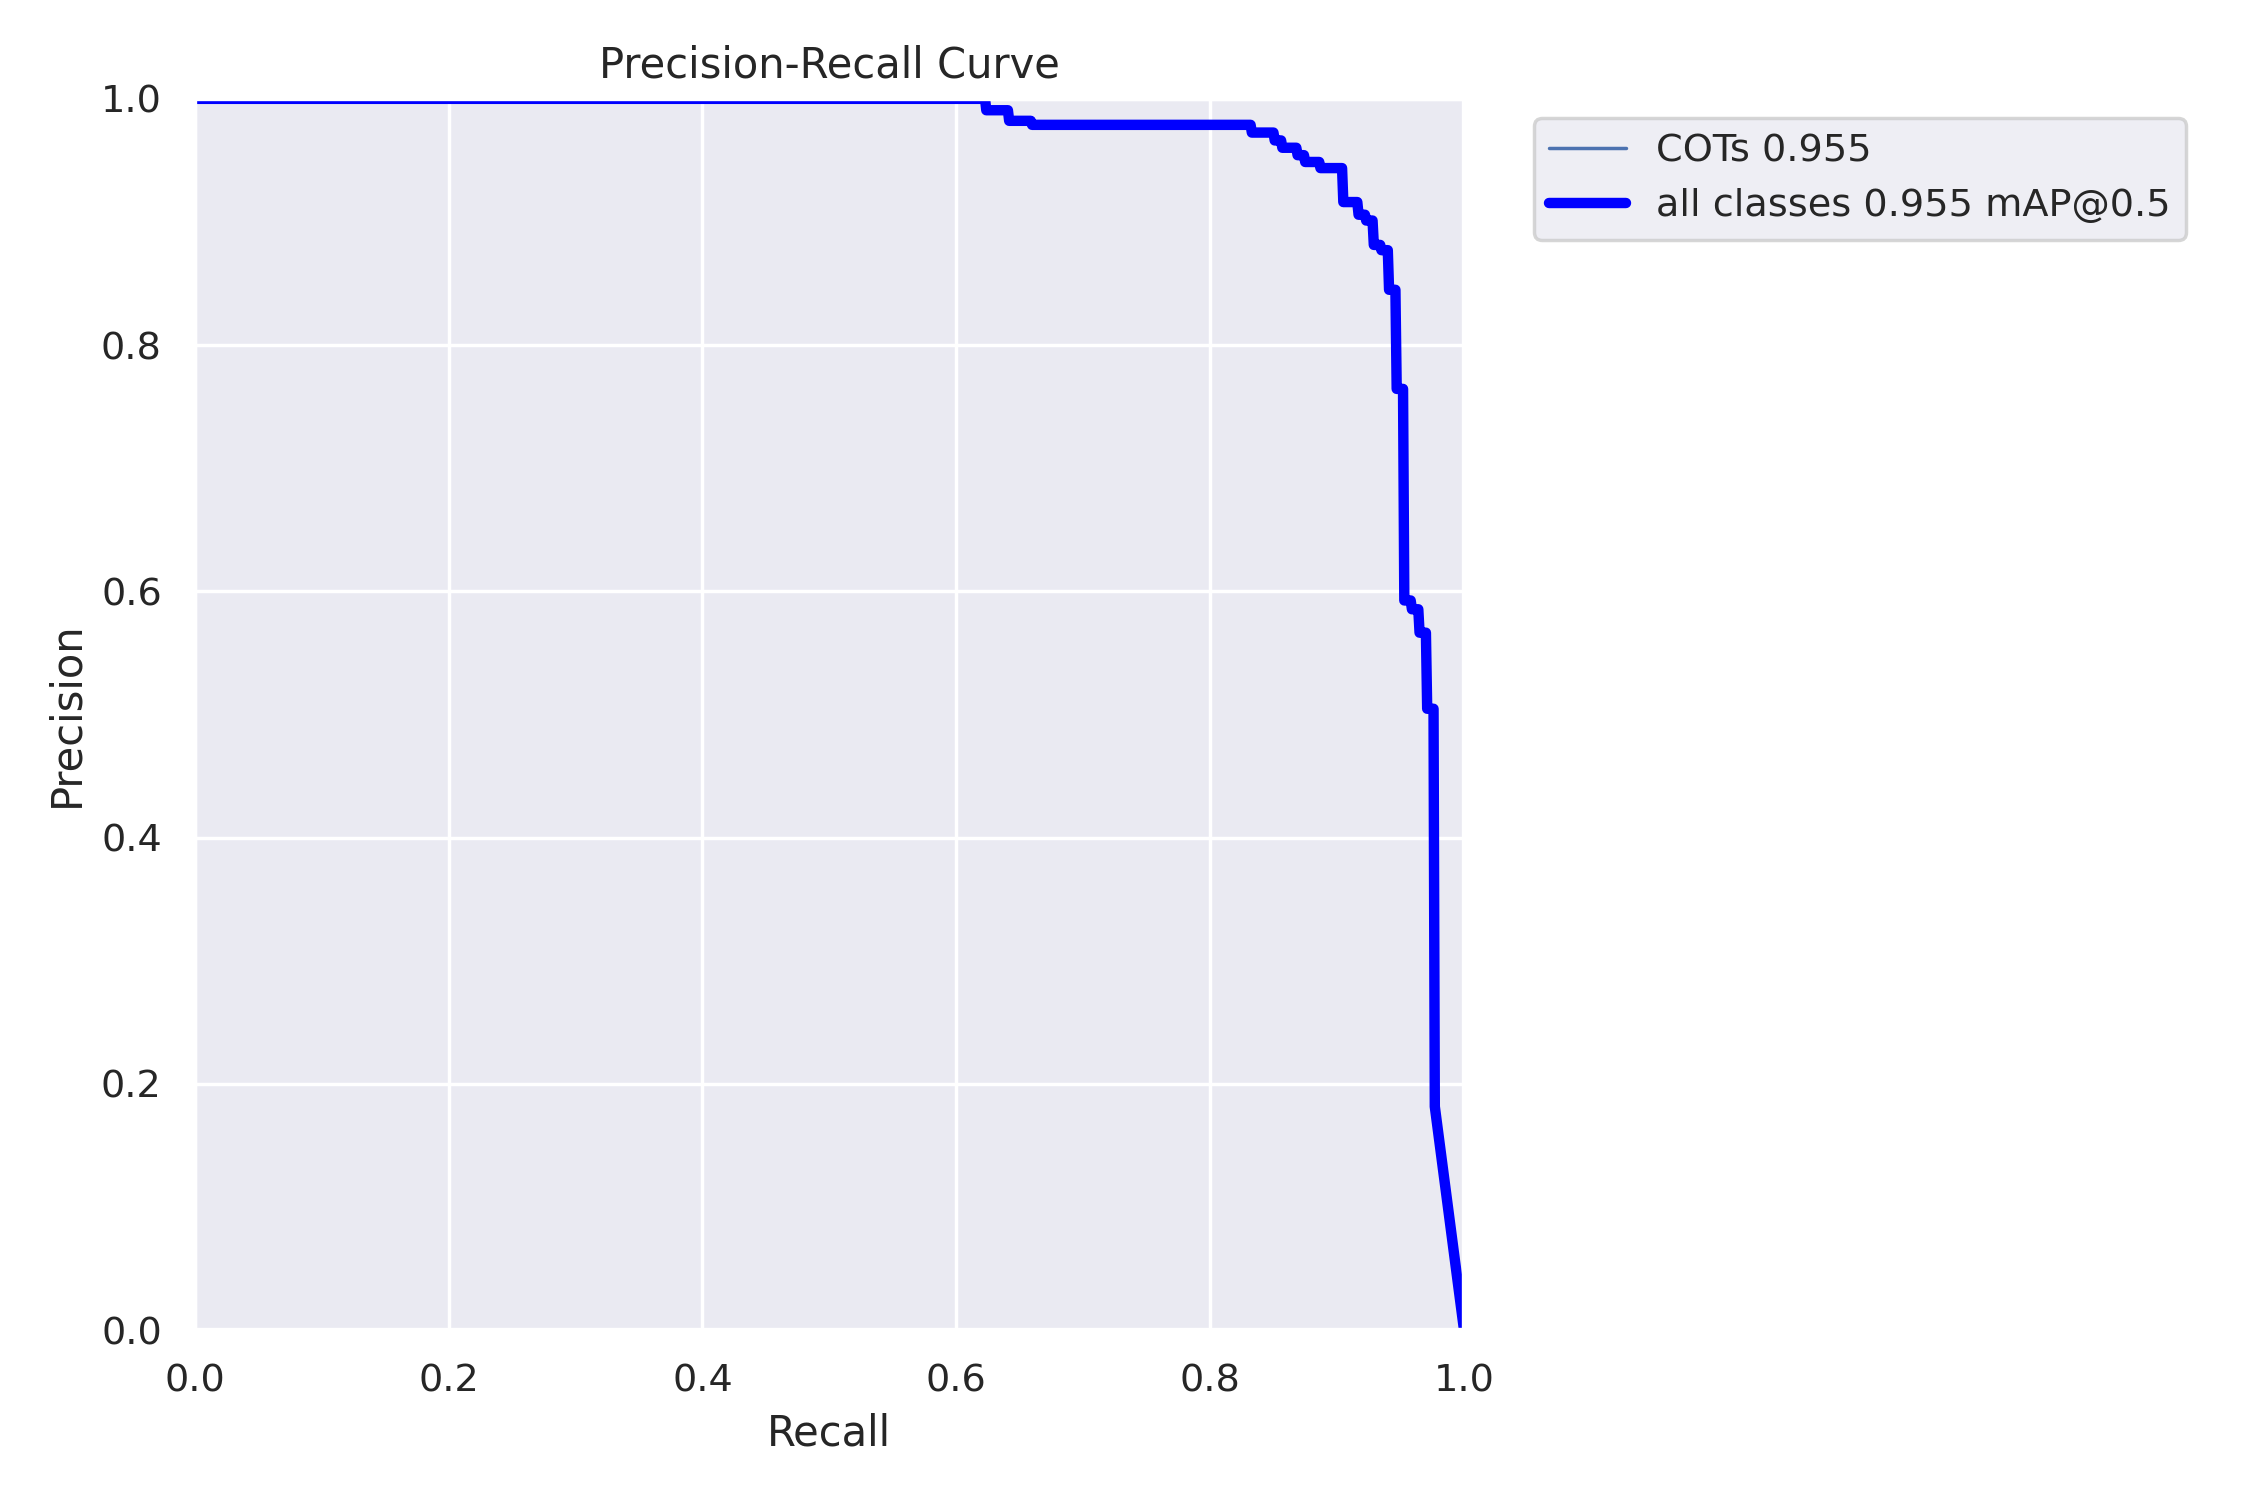

In [13]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

### 3.2. YOLOv8s - Validation


In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-16 10:57:10.672047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 10:57:11.692669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Google-Images-2/valid/labels.cache... 227 images, 116 backgrounds, 0 corrupt: 100% 227/227 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:05<00:00,  2.54it/s]
                   all        227        167      0.936      0.904      0.955        0.6
Speed: 1.9ms pre-process, 13.7ms

In [15]:
!ls {HOME}/runs/detect/val/

confusion_matrix.png  R_curve.png	     val_batch1_pred.jpg
F1_curve.png	      val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png	      val_batch0_pred.jpg    val_batch2_pred.jpg
PR_curve.png	      val_batch1_labels.jpg


/content


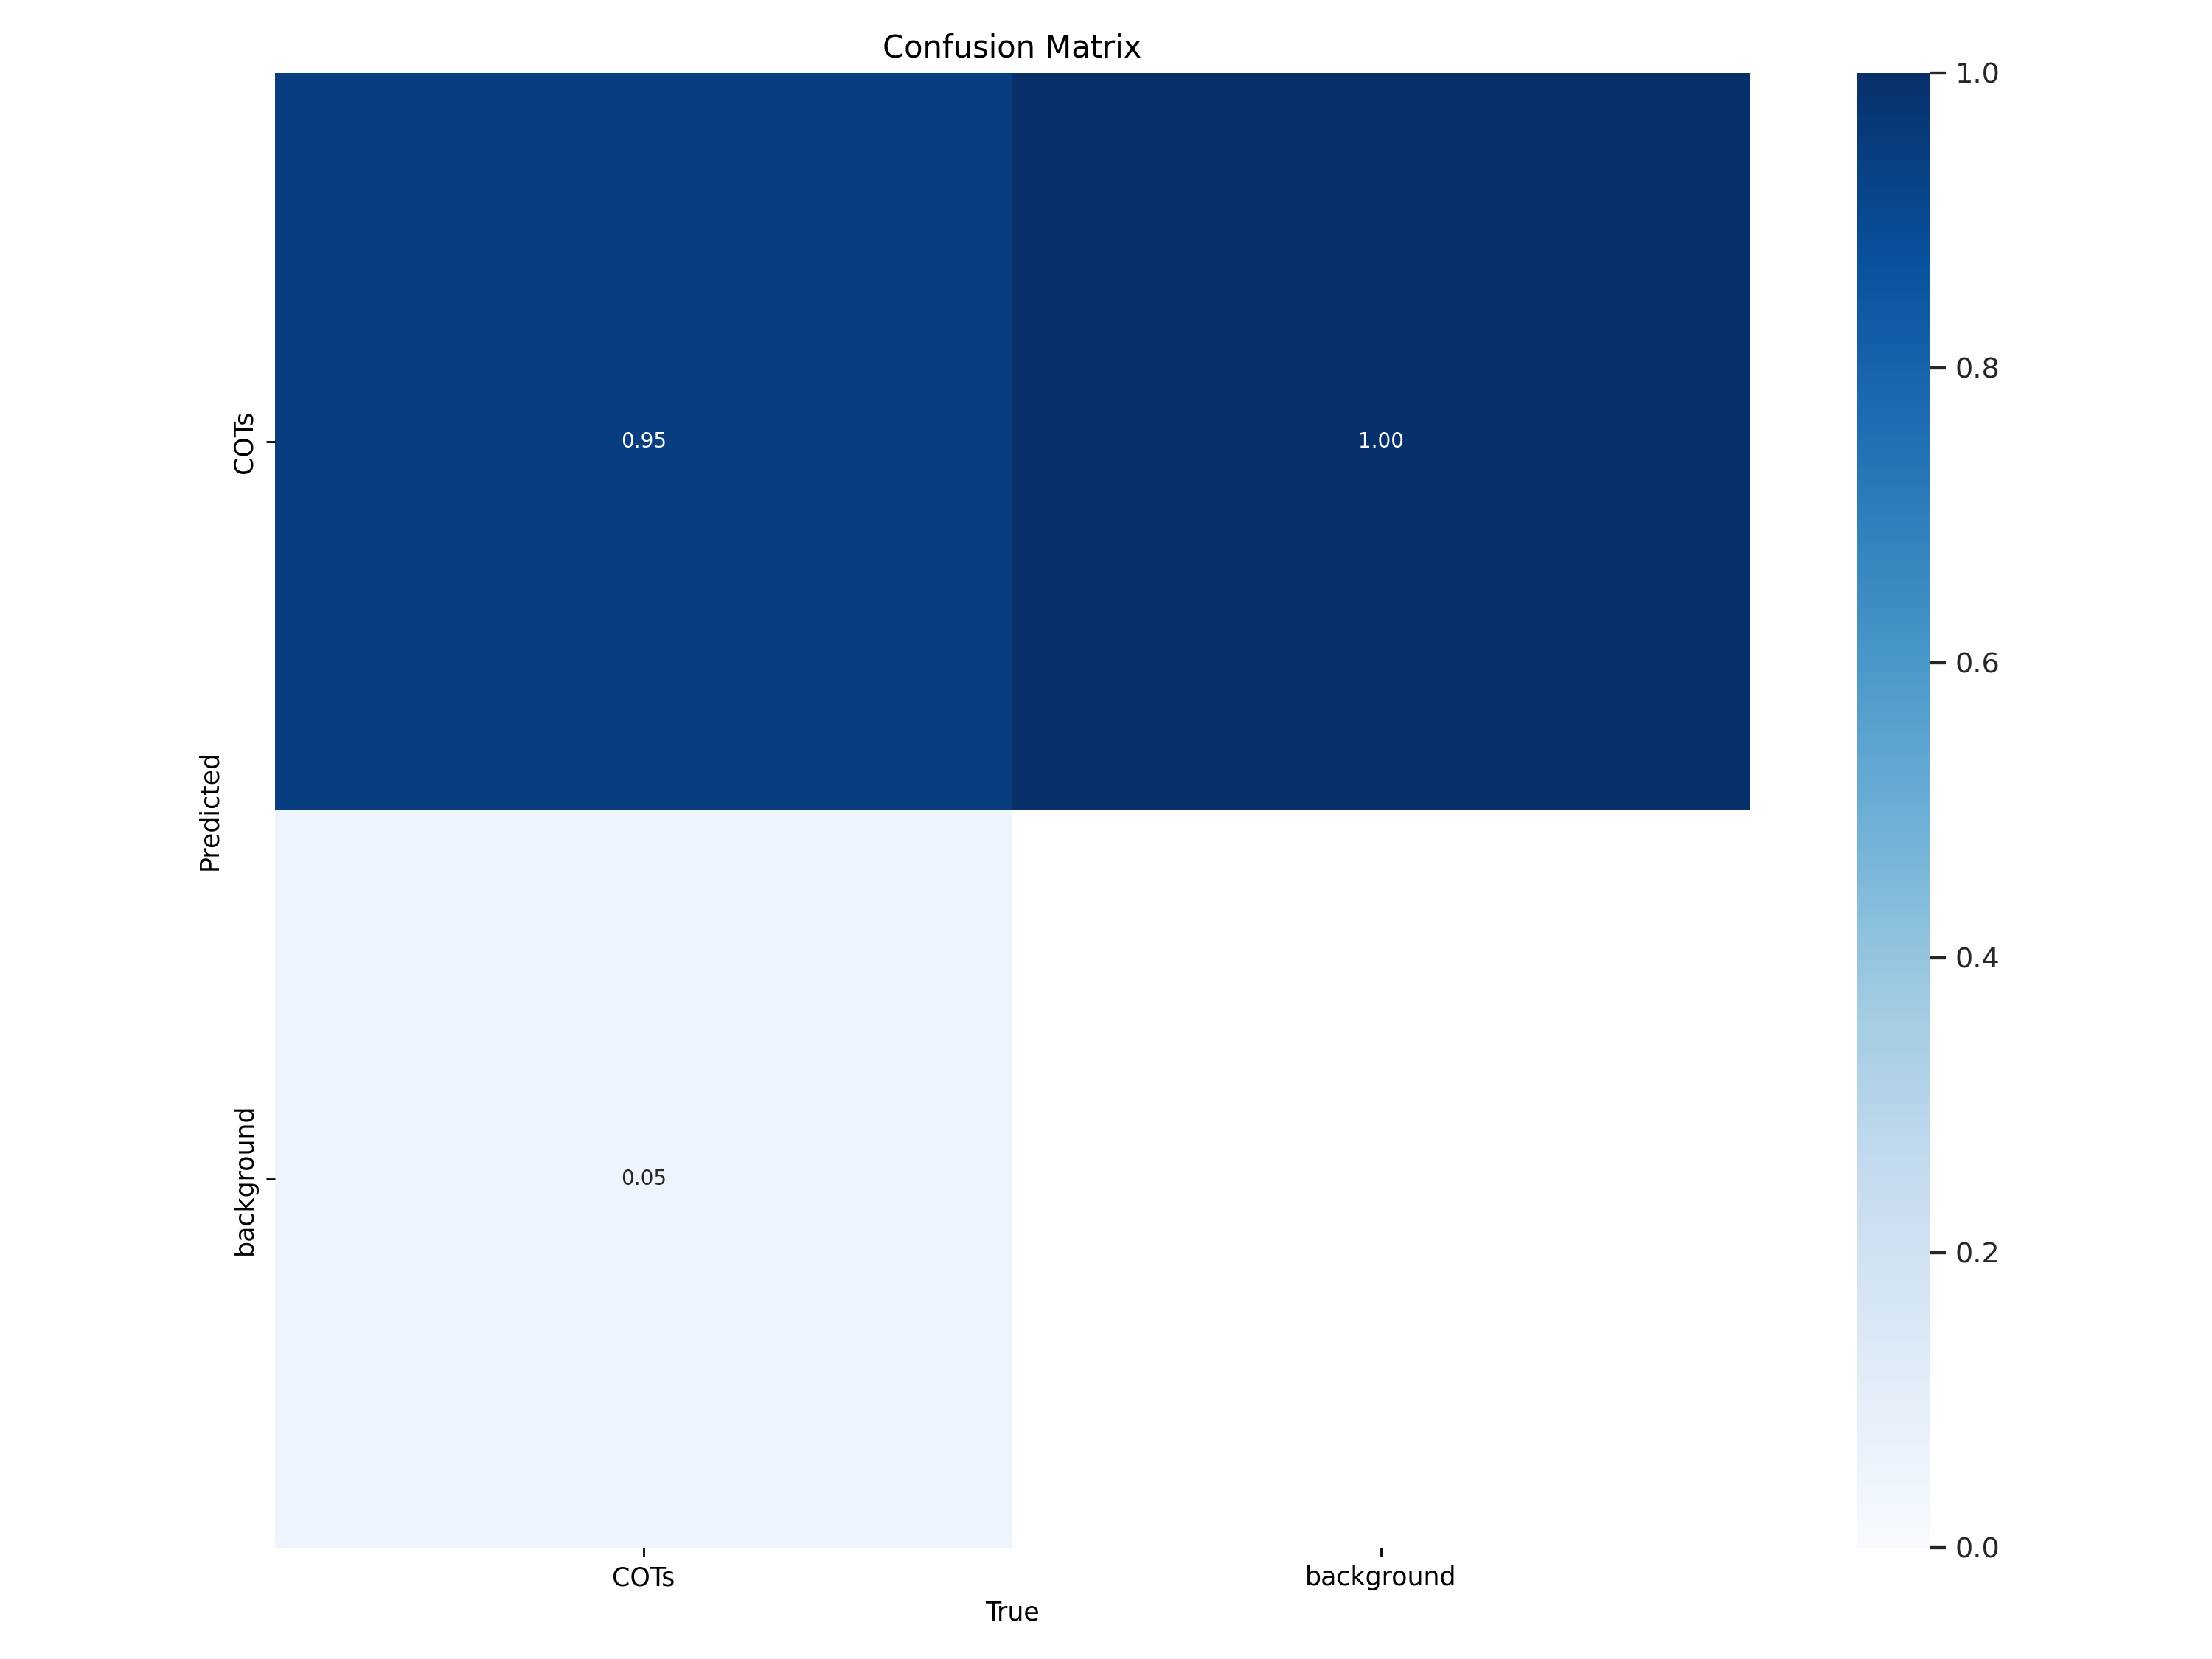

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


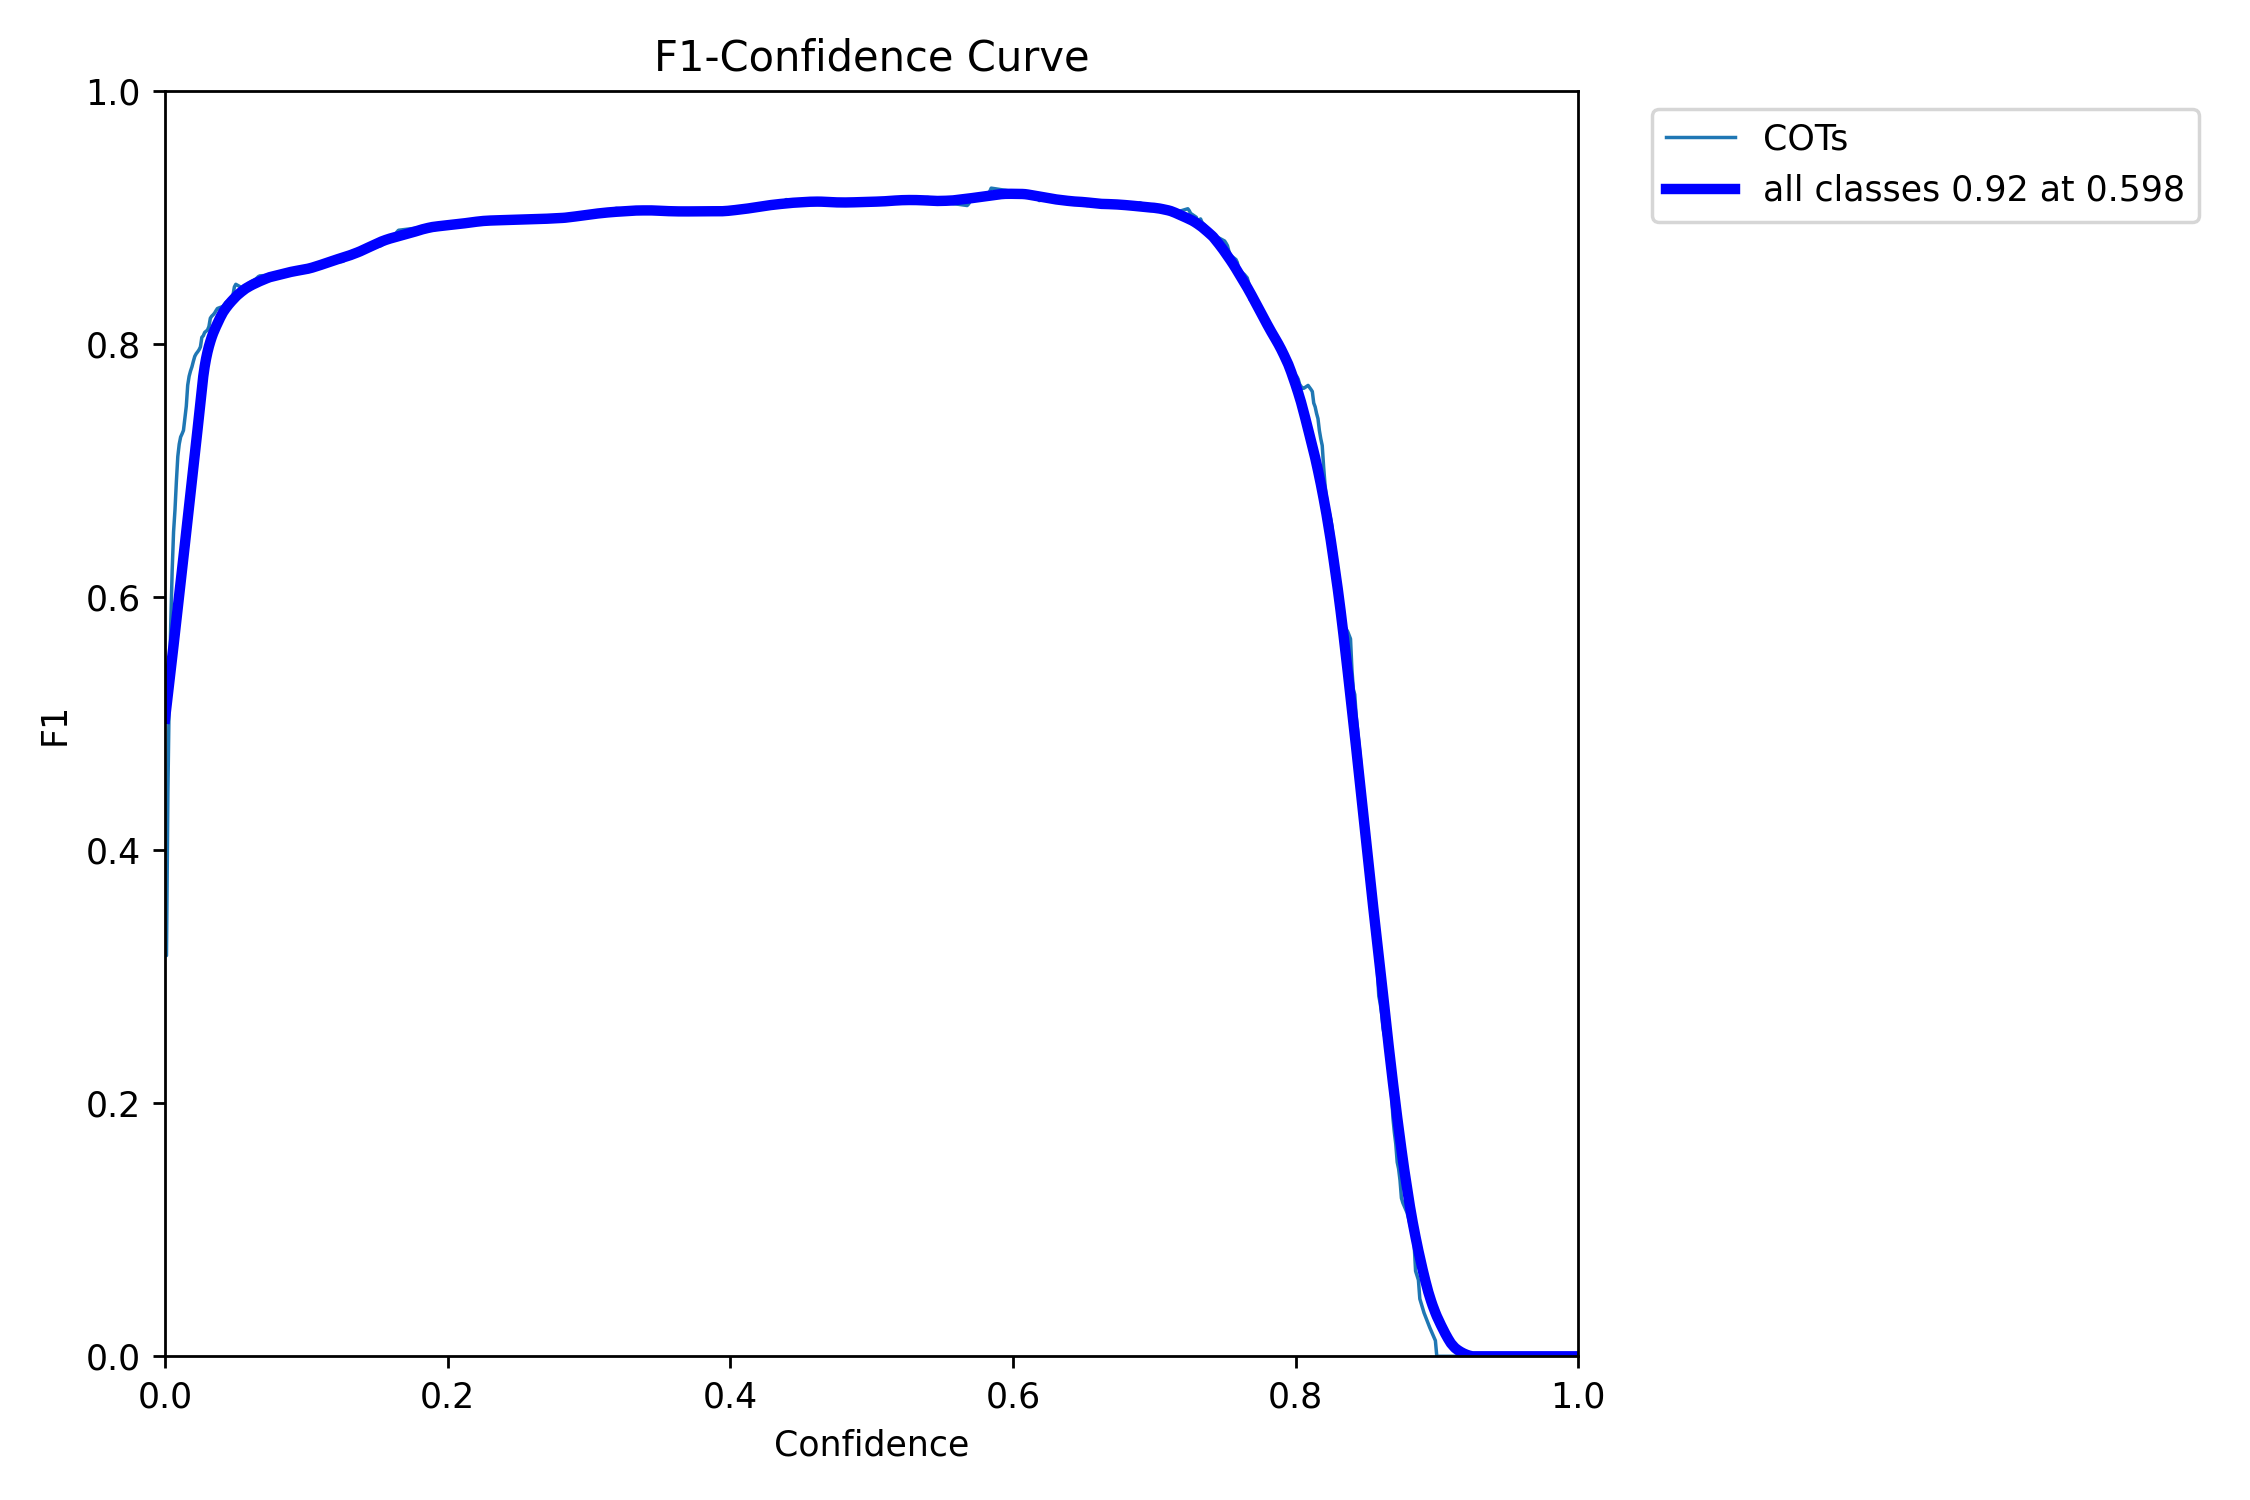

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/F1_curve.png', width=600)

/content


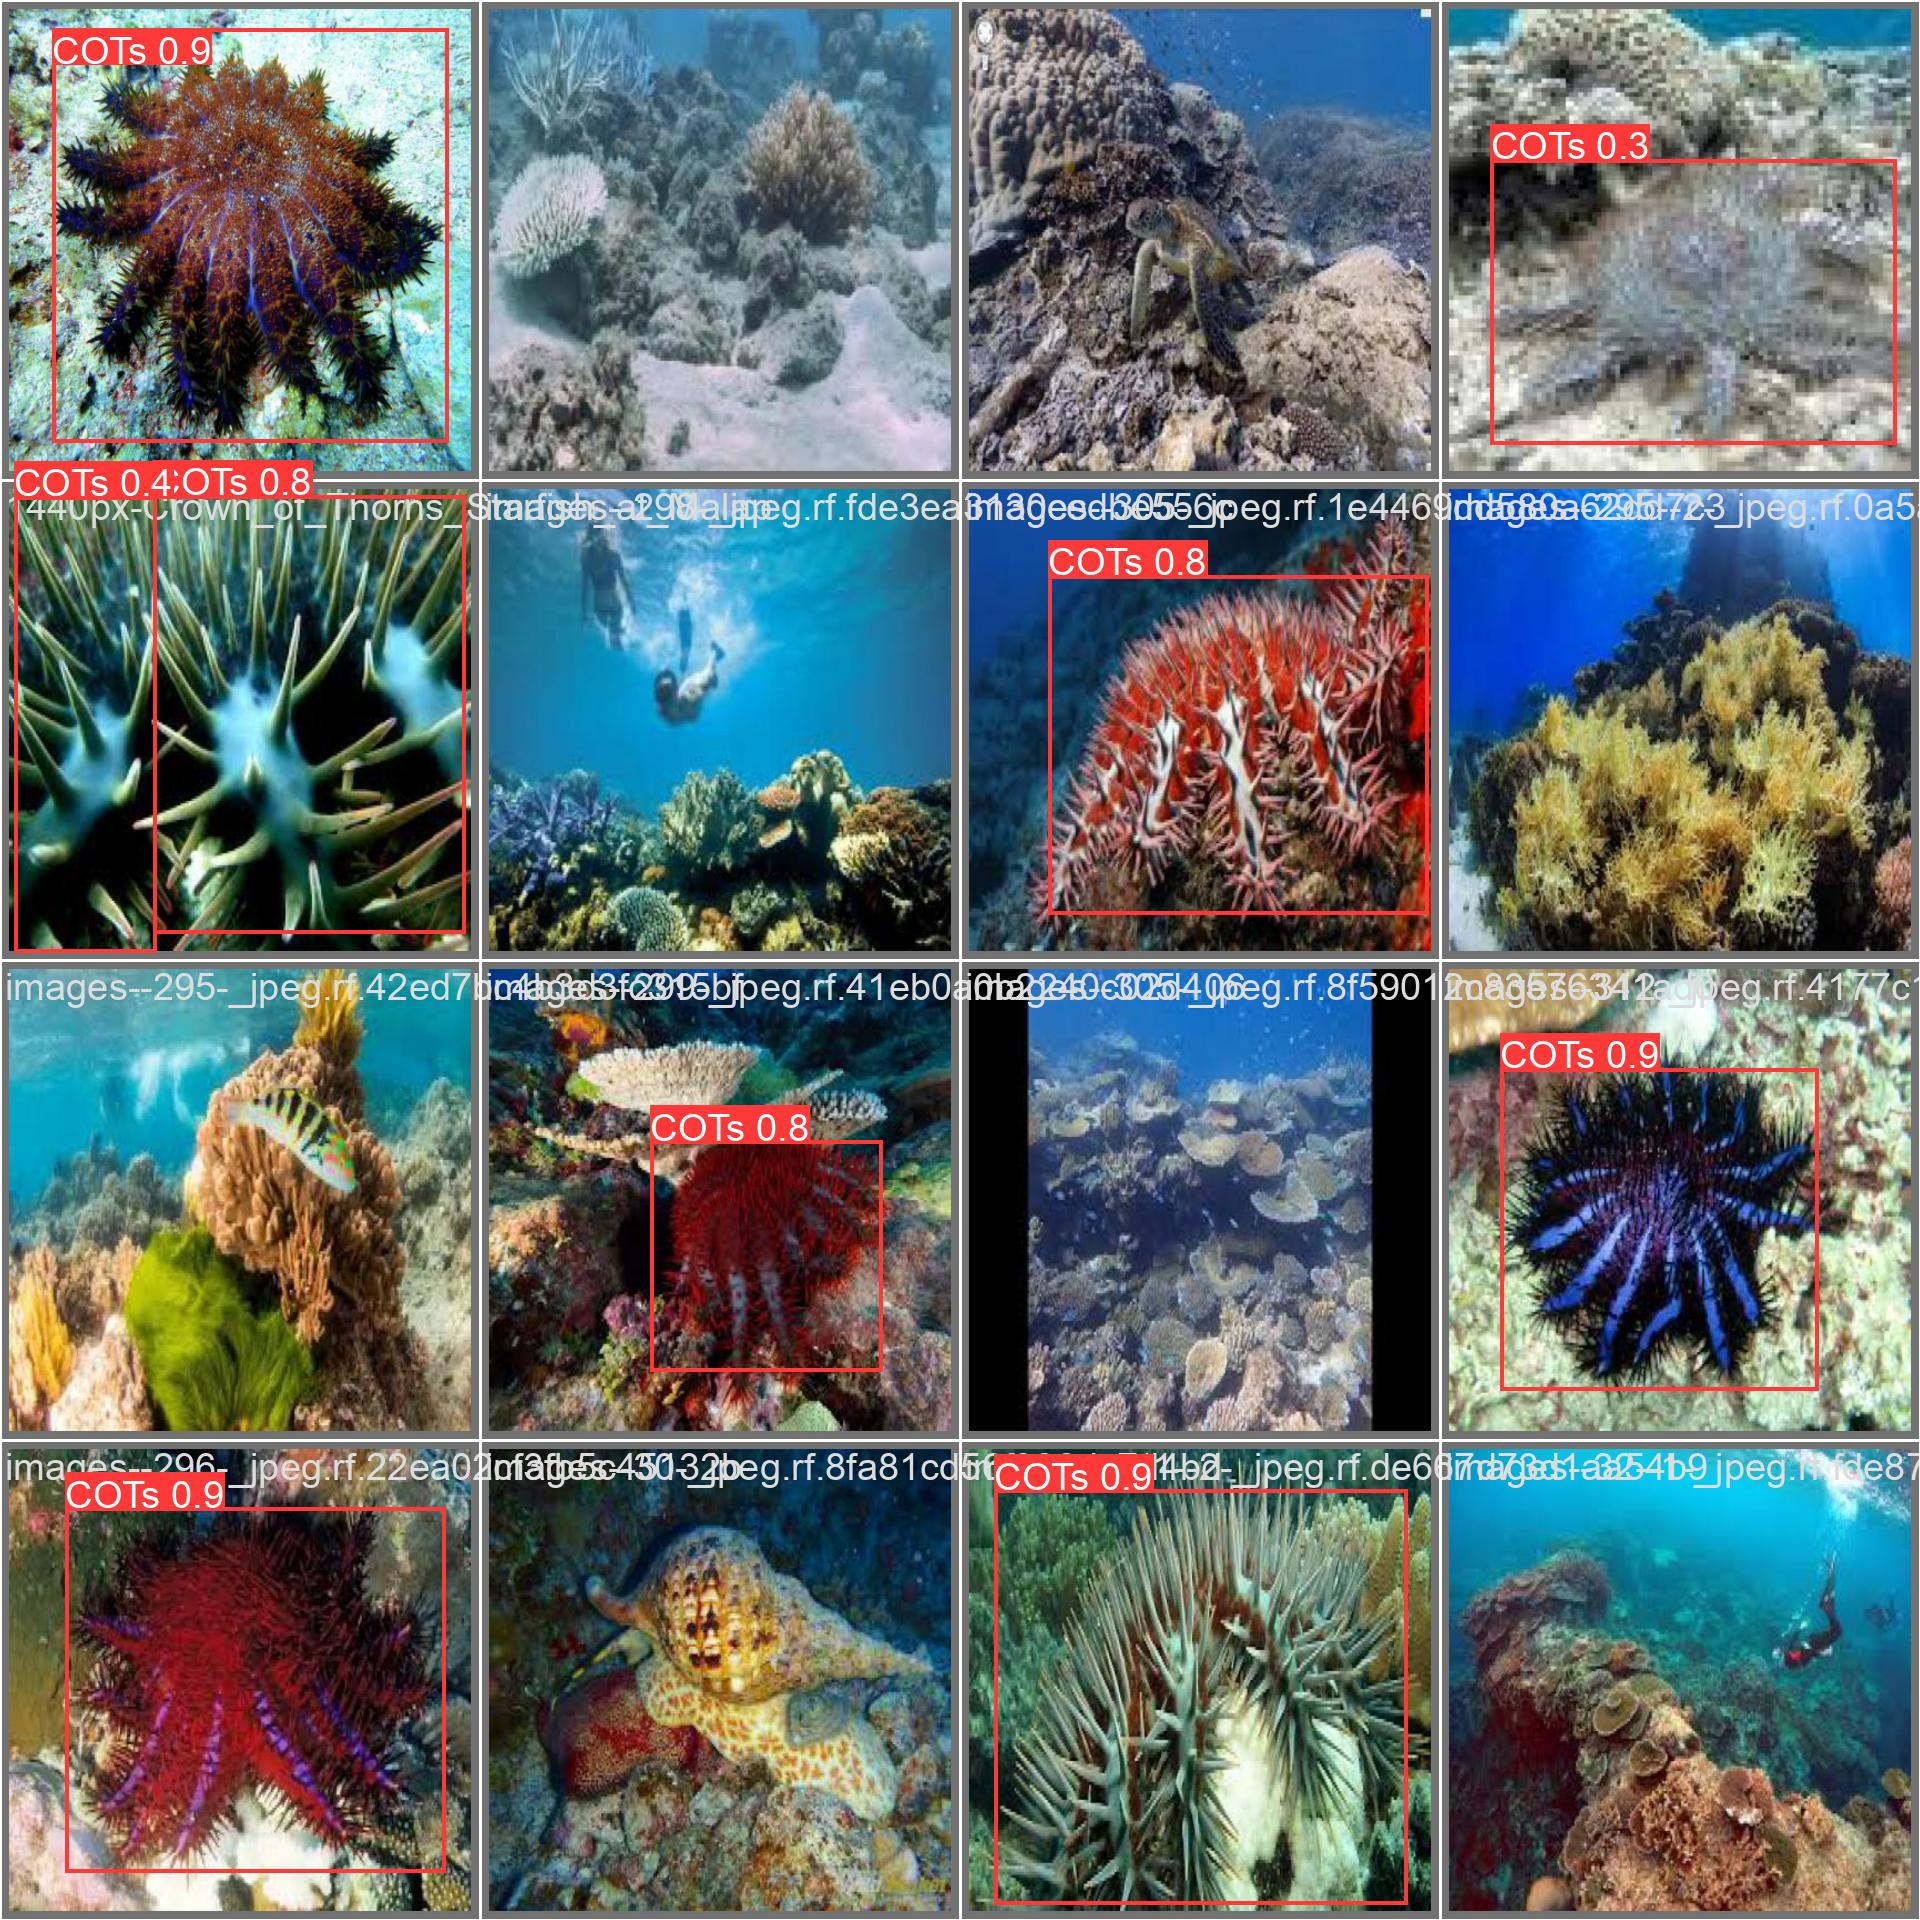

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

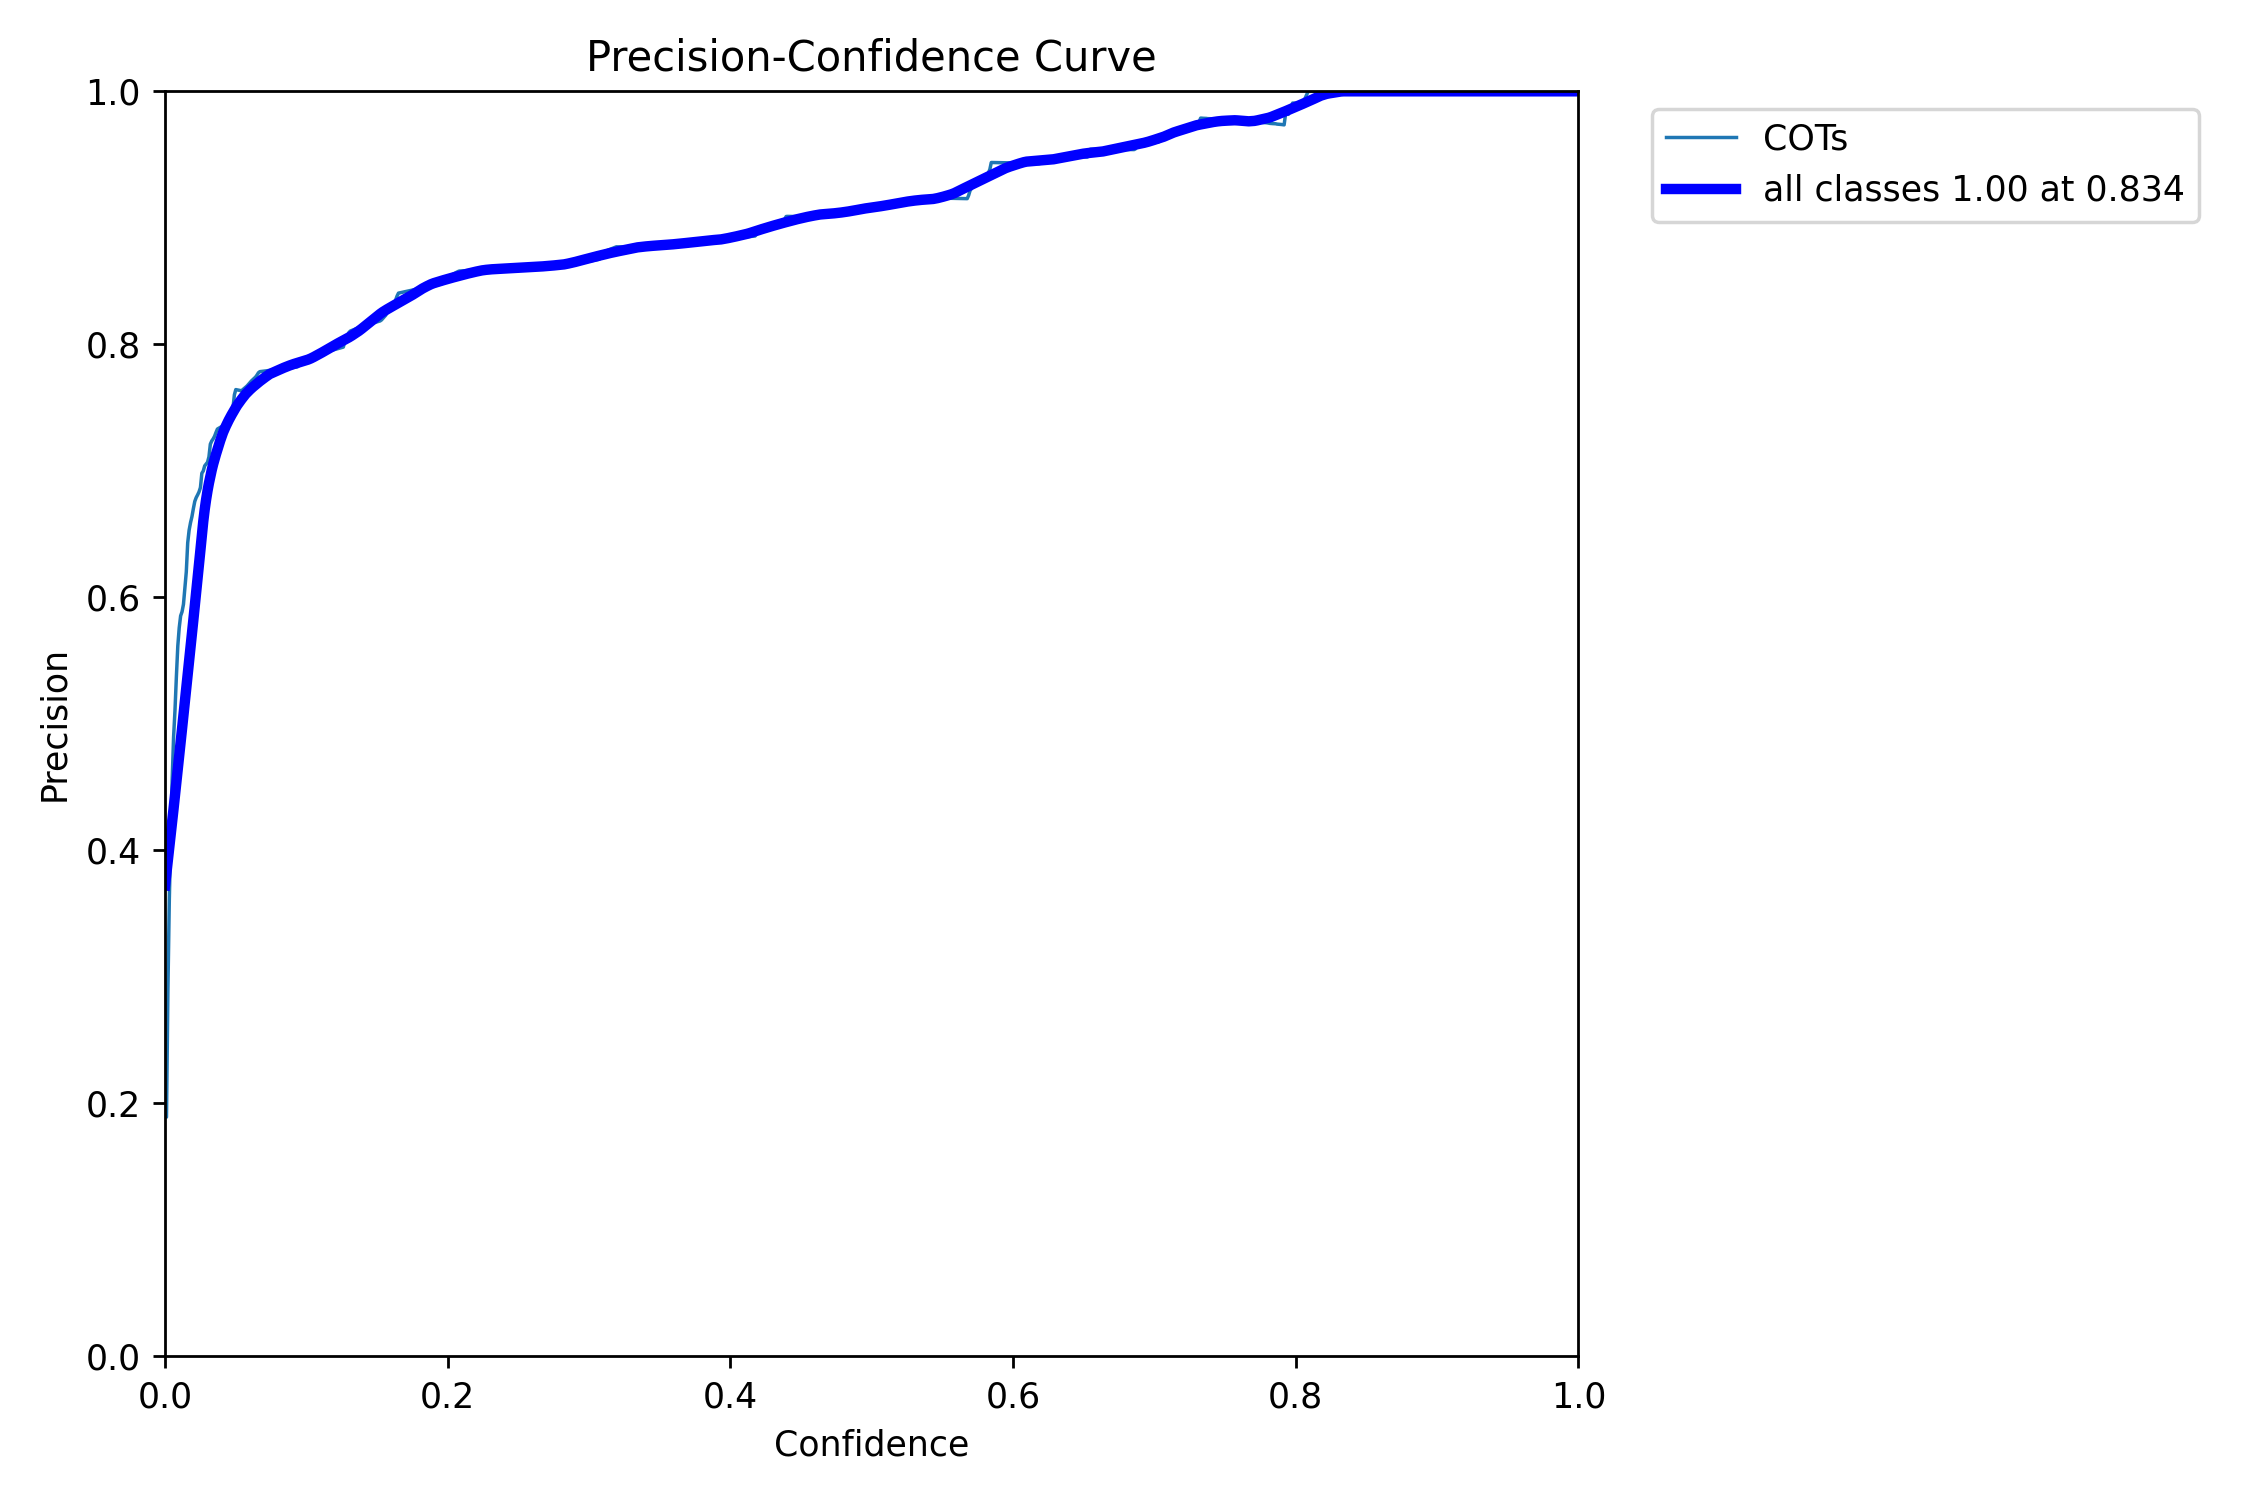

In [19]:
Image(filename=f'{HOME}/runs/detect/val/P_curve.png', width=600)

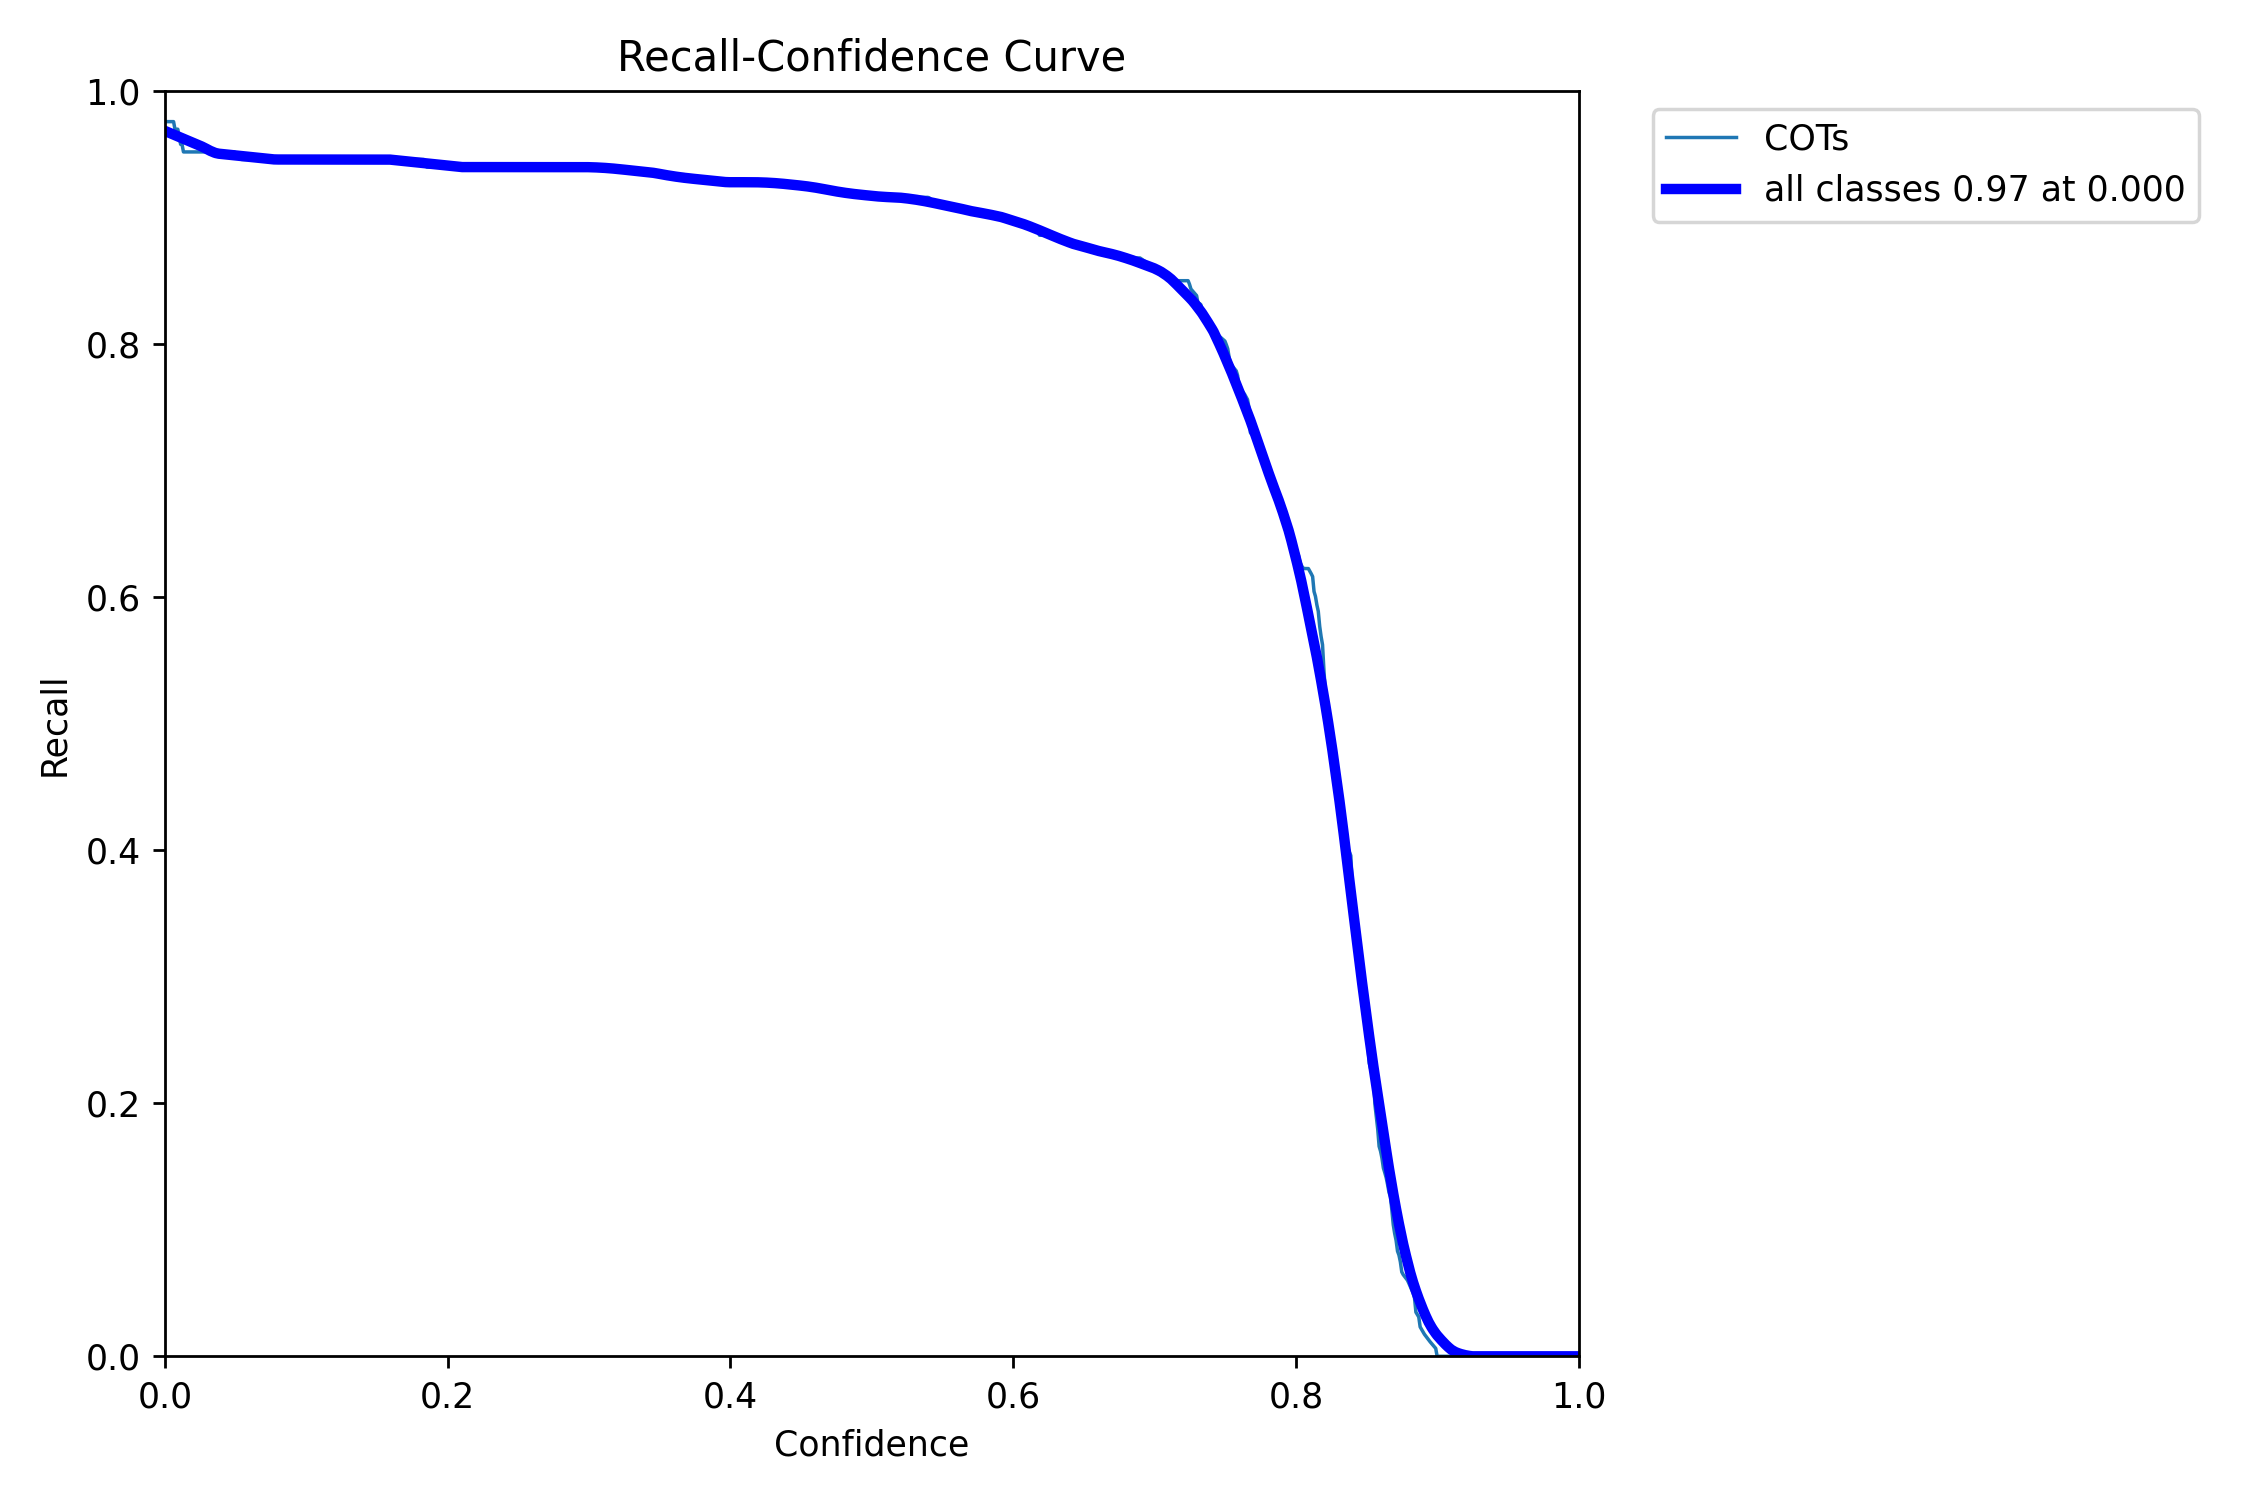

In [20]:
Image(filename=f'{HOME}/runs/detect/val/R_curve.png', width=600)

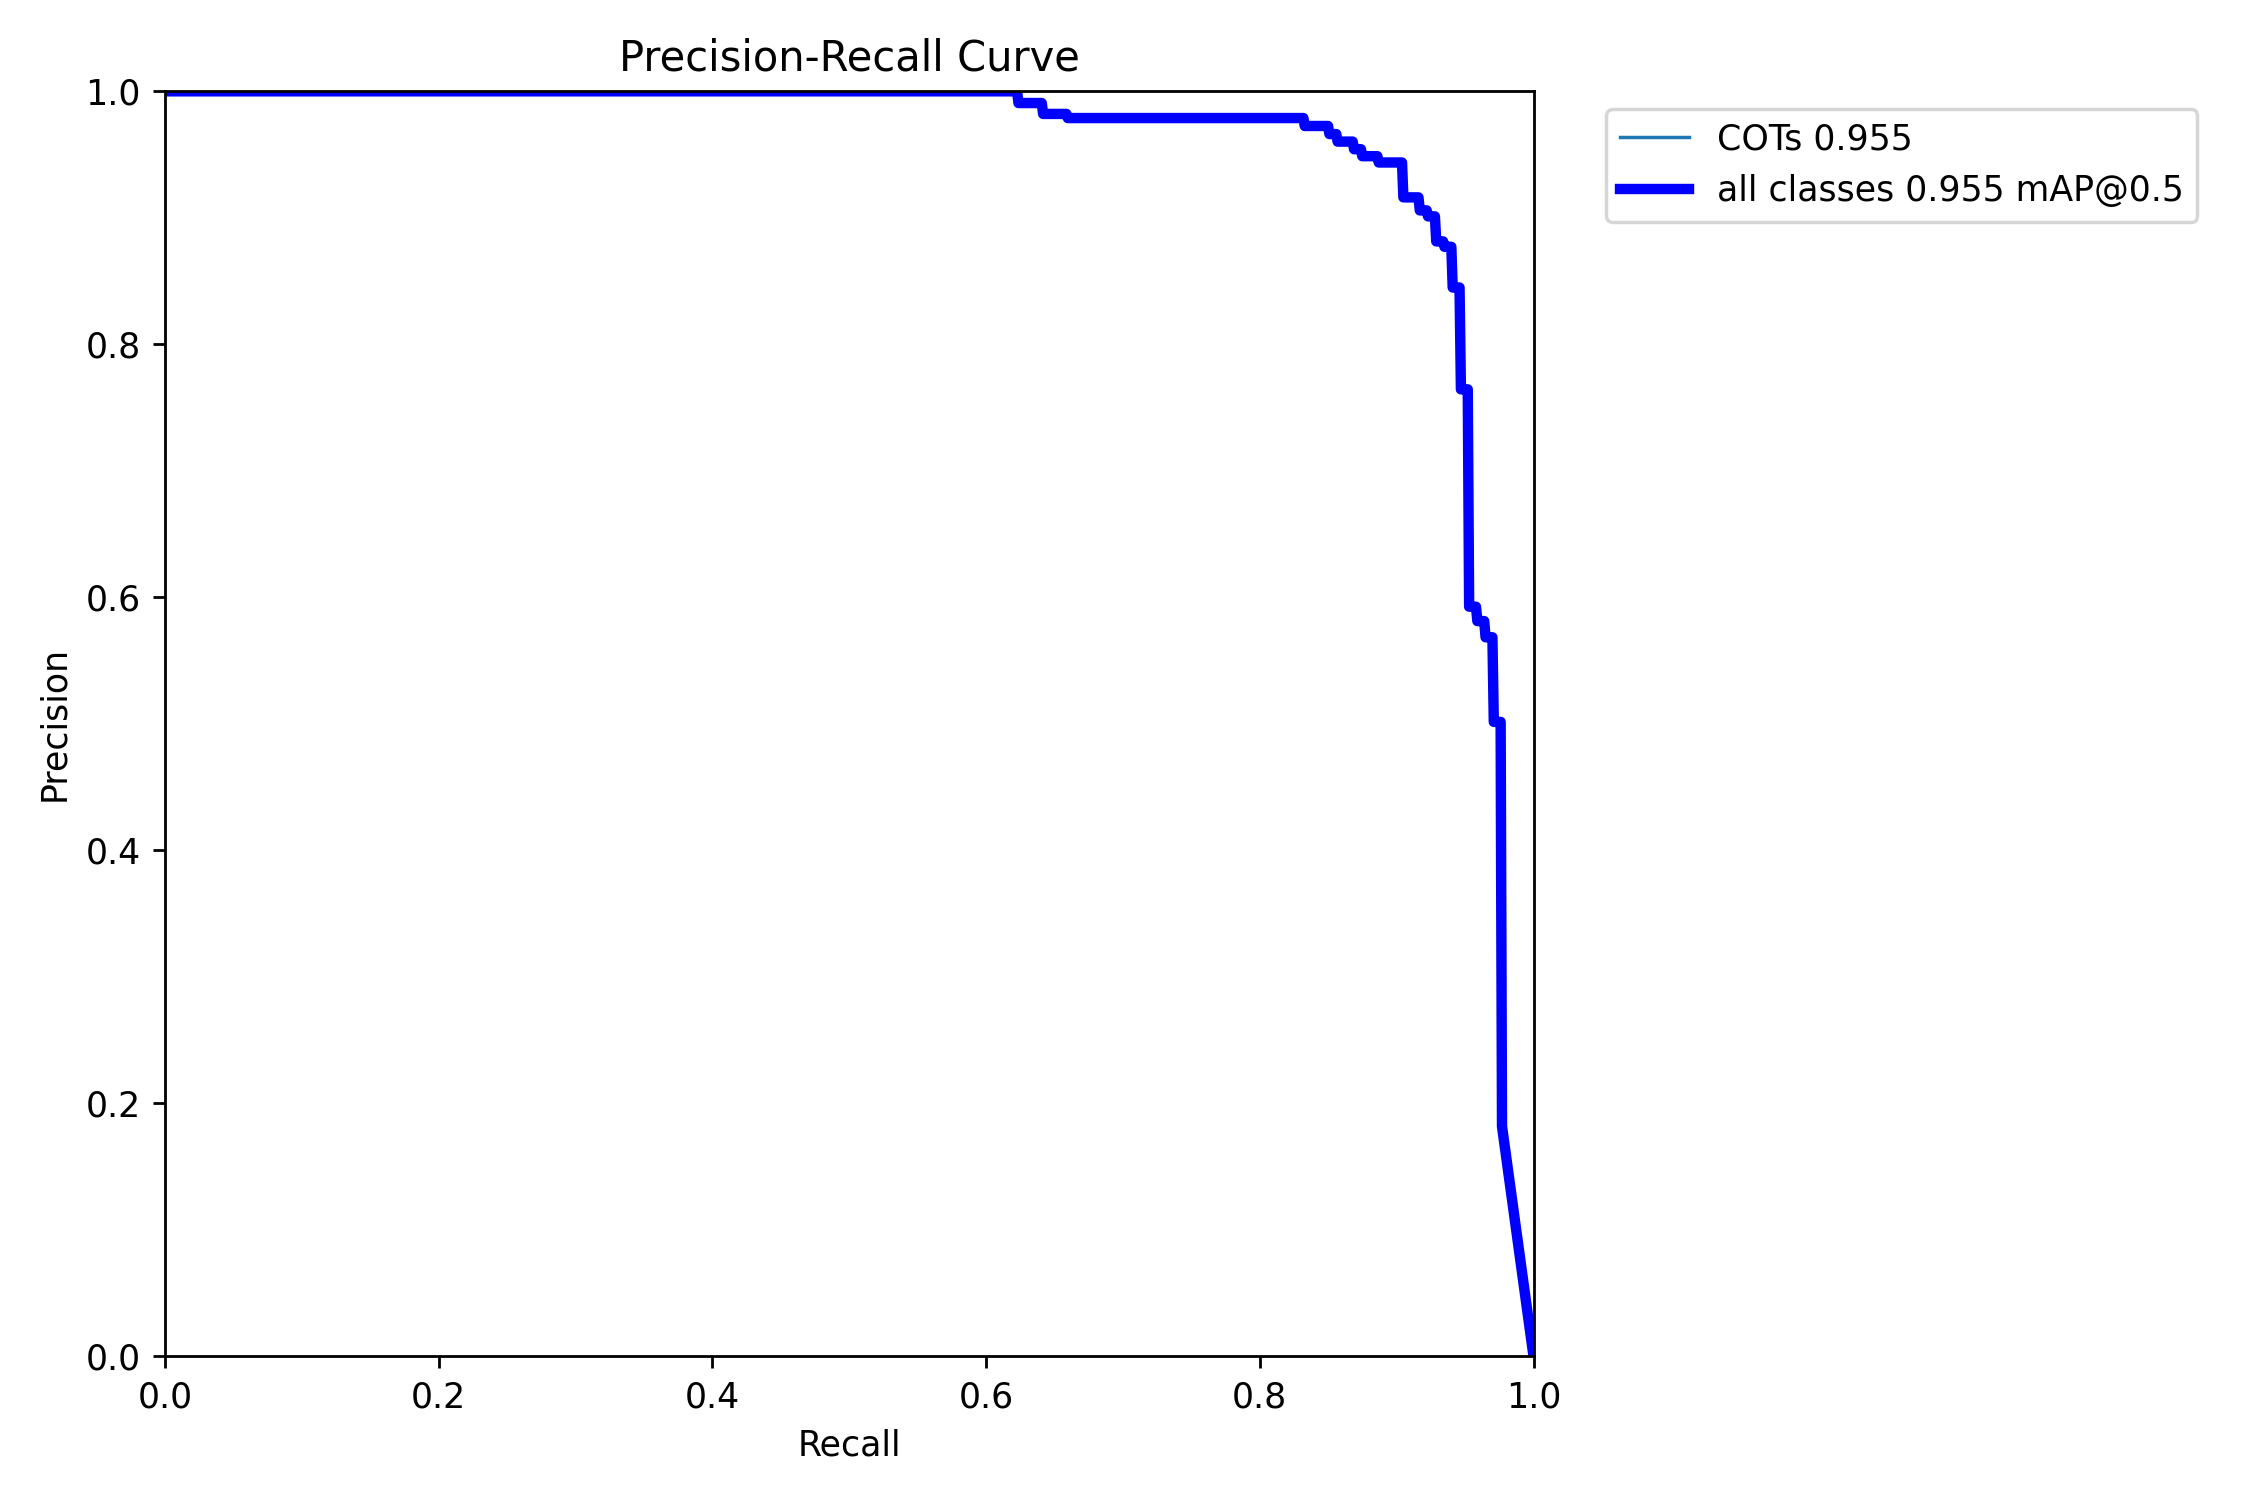

In [21]:
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

### 3.3. YOLOv8s - Prediction

In [22]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

2023-09-16 10:58:15.281484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 10:58:16.289096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/52 /content/datasets/Google-Images-2/test/images/8cots-and-diver-6-jpeg_jpg.rf.867a548c9b9407298c62447571aba92a.jpg: 800x800 2 COTss, 24.8ms
image 2/52 /content/datasets/Google-Images-2/test/images/AdobeStock_86743037-696x464-1-_jpeg.rf.c33f8c4f5defa5ac0791e7295b293e4a.jpg: 800x800 1 COTs, 24.8ms
image 3/52 /content/datasets/Google-Images-2/test/images/From-google-1024x683-1-_jpg.rf.88

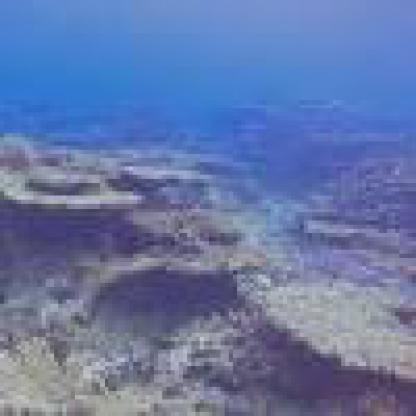

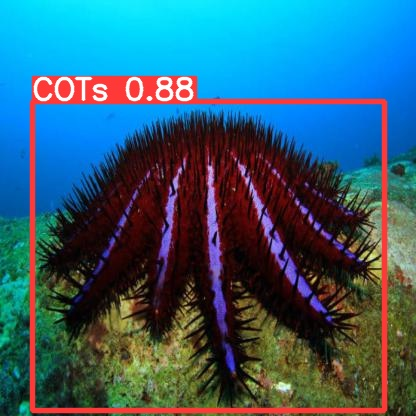

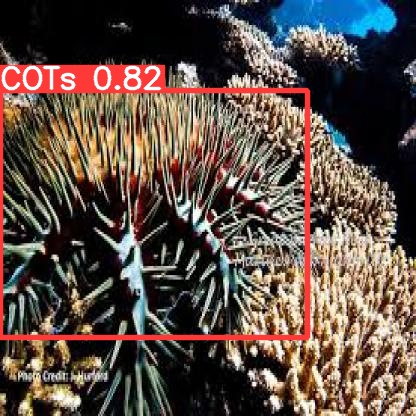

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Running on video of COTs

In [24]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/cotsclip1.mp4 save=True

2023-09-16 10:59:16.959641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 10:59:17.975841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/230) /content/cotsclip1.mp4: 480x800 1 COTs, 74.7ms
video 1/1 (2/230) /content/cotsclip1.mp4: 480x800 1 COTs, 15.5ms
video 1/1 (3/230) /content/cotsclip1.mp4: 480x800 1 COTs, 15.5ms
video 1/1 (4/230) /content/cotsclip1.mp4: 480x800 1 COTs, 15.4ms
video 1/1 (5/230) /content/cotsclip1.mp4: 480x800 1 COTs, 15.5ms
video 1/1 (6/230) /content/cotsclip1.mp4: 480x800 1 COTs, 15.5ms
video 

In [25]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/cotsclip2.mp4 save=True

2023-09-16 10:59:41.754267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 10:59:42.771055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/256) /content/cotsclip2.mp4: 480x800 75.9ms
video 1/1 (2/256) /content/cotsclip2.mp4: 480x800 1 COTs, 15.4ms
video 1/1 (3/256) /content/cotsclip2.mp4: 480x800 1 COTs, 15.4ms
video 1/1 (4/256) /content/cotsclip2.mp4: 480x800 1 COTs, 15.5ms
video 1/1 (5/256) /content/cotsclip2.mp4: 480x800 1 COTs, 15.4ms
video 1/1 (6/256) /content/cotsclip2.mp4: 480x800 1 COTs, 15.5ms
video 1/1 (7/2